## <u>Name</u> : ADVAIT GURUNATH CHAVAN
## <u>Contact</u> : +91 70214 55852
## <u>Email Id</u> : advaitchavan135@gmail.com , advaitchavan.yoshops@gmail.com
## Yoshops Data Science Intern Project Task-2

#### Create EDA using Test Data file(Yoshops.com Sale Order file) :
#### Input Value for genrate Graph chart:
#### Enter 1 to see the analysis of Reviews given by Customers
#### Enter 2 to see the analysis of different payment methods used by the Customers
#### Enter 3 to see the analysis of Top Consumer States of India
#### Enter 4 to see the analysis of Top Consumer Cities of India
#### Enter 5 to see the analysis of Top Selling Product Categories
#### Enter 6 to see the analysis of Reviews for All Product Categories
#### Enter 7 to see the analysis of Number of Orders Per Month Per Year
#### Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year
#### Enter 9 to see the analysis of Number of Orders Across Parts of a Day
#### Enter 10 to see the Full Report


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image
import matplotlib.pyplot as plt

In [2]:
#Exploring the orders and reviews dataset
orders = pd.read_csv('orders.csv')
reviews = pd.read_csv('review.csv')

## Customer Reviews

In [3]:
def customer_reviews():
    list_star_value = reviews.stars.value_counts().keys().to_list()
    list_star_value_count = list(reviews.stars.value_counts())
    customer_reviews = pd.DataFrame(list(zip(list_star_value,list_star_value_count)),columns=['Stars_given_by_customers','Stars_count'])
    a = list(customer_reviews['Stars_given_by_customers'])
    b = list(customer_reviews['Stars_count'])
    
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    fig1, ax =plt.subplots(figsize=(12,4))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=customer_reviews.values,colLabels=customer_reviews.columns,loc='center')
    
    
    fig2 = plt.figure()
    plt.barh(a, b)
    plt.ylabel('Star Rating')
    plt.xlabel('Star count')
    for index, value in enumerate(b):
        plt.text(value, index,
                 str(value),color = 'red', fontweight = 'bold', size=12)
    plt.title('Reviews given by Customers -- Bar Plot')
    
    fig3 = plt.figure()
    palette_color = sns.color_palette('bright')
    plt.pie(b, labels=a, colors=palette_color, autopct='%.0f%%')
    plt.title("Reviews given by Customers -- Pie Plot")
    
    
    
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("DataFrames")
    
    # create a new worksheet for figures
    fig_sheet = workbook.create_sheet("Figures")
    
            
    # write the figures to the worksheet
    
    for fig_idx, fig in enumerate([fig2, fig3], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        fig_sheet.add_image(img, f"A{fig_idx}")
        #fig_idx = fig_idx + 1
        
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([customer_reviews], start=1):
        rows = dataframe_to_rows(customer_reviews, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
    
    
    workbook.save("customer_reviews.xlsx")
    
    filename = "customer_reviews.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename) 



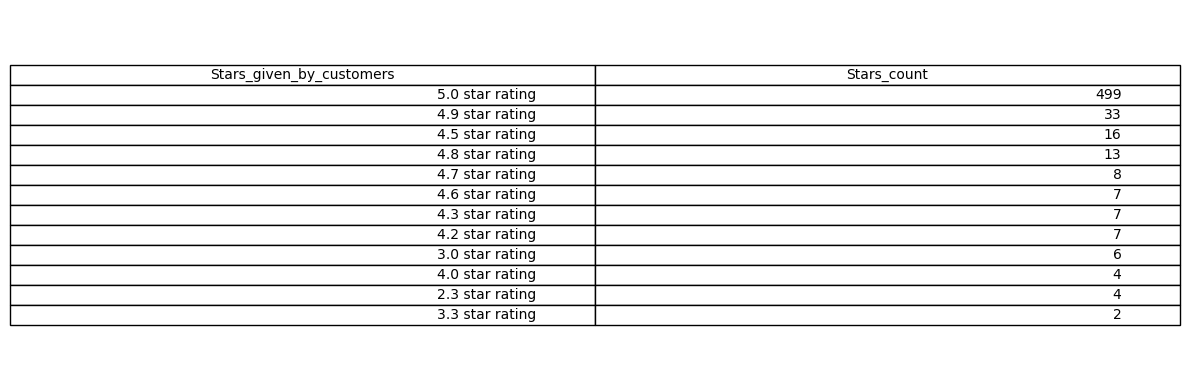

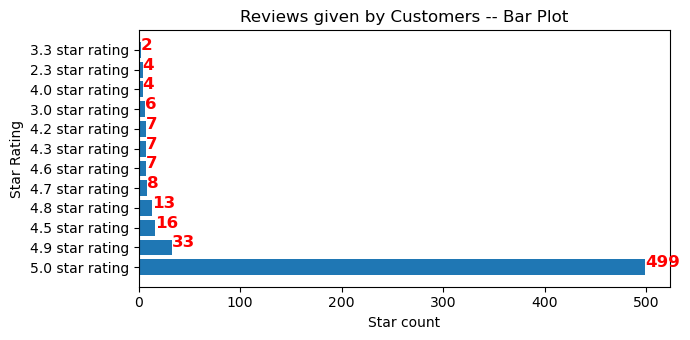

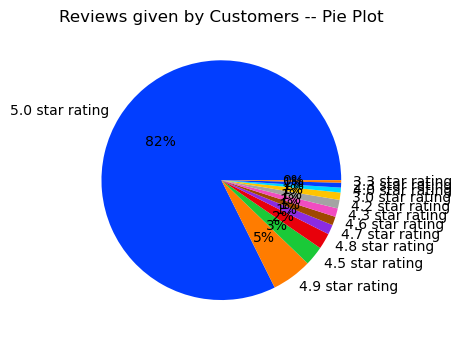

In [4]:
customer_reviews()

## Different payment methods used by the Customers

In [5]:
def payment_methods():
    pay_met = orders
    pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace('\d+', '')
    pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace('₹,.', '')
    pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace('₹.', '')
    pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace('-', '')
    pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace(';', '')
    pay_type = list(pay_met['Payment_Method'].value_counts().keys())
    pay_type_count = pay_met['Payment_Method'].value_counts().to_list()
    pay_df = pd.DataFrame(list(zip(pay_type,pay_type_count)), columns = ['Payment Type','Count'])
    c = list(pay_df['Payment Type'])
    d = list(pay_df['Count'])
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    fig4, ax =plt.subplots(figsize=(12,4))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=pay_df.values,colLabels=pay_df.columns,loc='center')
    
    fig5 = plt.figure()
    plt.barh(c, d)
    plt.ylabel('Payment Type')
    plt.xlabel('Count')
    for index, value in enumerate(d):
        plt.text(value, index,
                 str(value),color = 'red', fontweight = 'bold', size=12)
    plt.title('Different payment methods used by the Customers')
    
    fig6 = plt.figure()
    palette_color = sns.color_palette('bright')
    plt.pie(d, labels=c, colors=palette_color, autopct='%.0f%%')
    plt.title("Different payment methods used by the Customers")
    
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("DataFrames")
    
    # create a new worksheet for figures
    fig_sheet = workbook.create_sheet("Figures")
    
    # write the figures to the worksheet
    
    for fig_idx, fig in enumerate([fig5, fig6], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        fig_sheet.add_image(img, f"A{fig_idx}")
        
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([pay_df], start=1):
        rows = dataframe_to_rows(pay_df, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
            
    workbook.save("payment_method.xlsx")
    
    
    filename = "payment_method.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename) 

C:\Users\Advait\AppData\Local\Temp\ipykernel_1936\4246379048.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace('\d+', '')
C:\Users\Advait\AppData\Local\Temp\ipykernel_1936\4246379048.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace('₹,.', '')
C:\Users\Advait\AppData\Local\Temp\ipykernel_1936\4246379048.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  pay_met['Payment_Method'] = pay_met['Payment_Method'].str.replace('₹.', '')


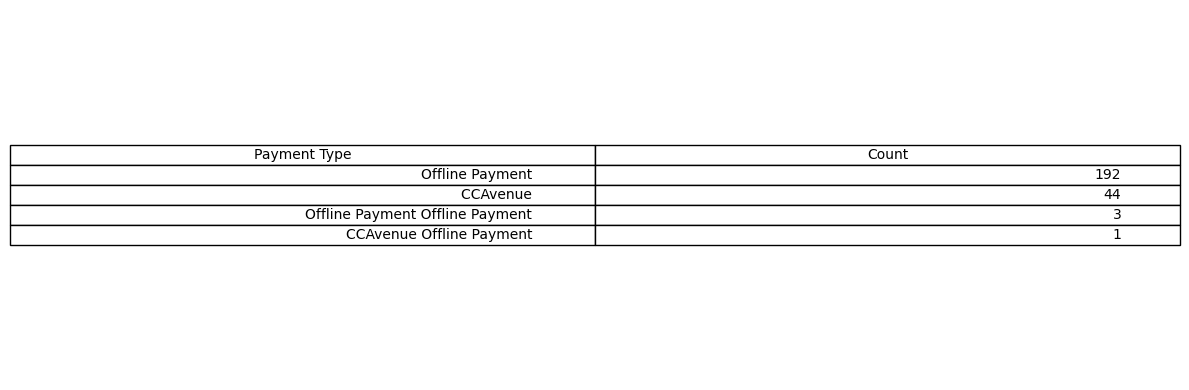

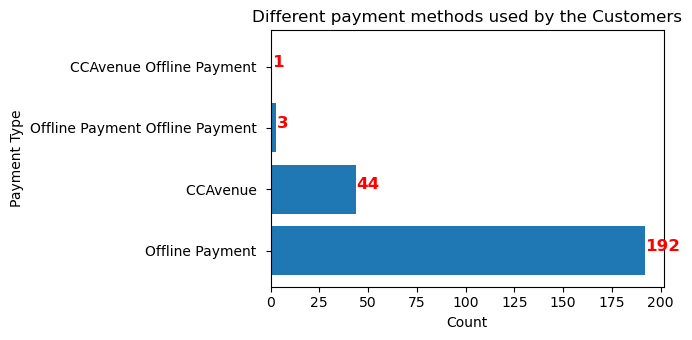

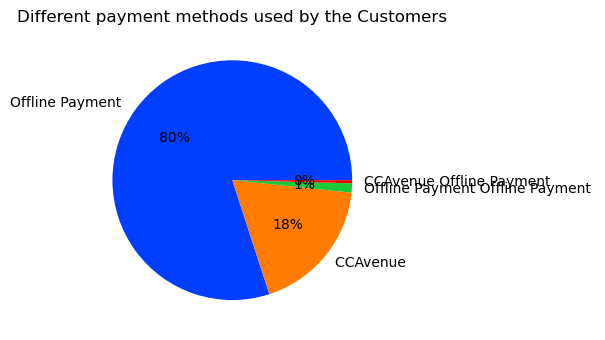

In [6]:
payment_methods()

## Top Consumer States of India¶

In [7]:
def top_consumer_states():
    consumer_state_list = list(orders['Shipping_State'].value_counts().keys())
    consumer_state_list_count = orders['Shipping_State'].value_counts()
    consumer_state_df = pd.DataFrame(list(zip(consumer_state_list,consumer_state_list_count)),columns=['State','Count'])
    e = list(consumer_state_df['State'])
    f = list(consumer_state_df['Count'])
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    fig7, ax =plt.subplots(figsize=(10,17))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=consumer_state_df.values,colLabels=consumer_state_df.columns,loc='center')
    
    
    fig8 = plt.figure(figsize=(10,17))
    plt.barh(e, f)
    plt.xlabel('Count')
    plt.ylabel('State Abbreviation Name')
    for index, value in enumerate(f):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('Consumer States')
    
    consumer_states_top_df = consumer_state_df.head(10)
    
    g = list(consumer_states_top_df['State'])
    h = list(consumer_states_top_df['Count'])
    fig9 = plt.figure()
    plt.barh(g, h)
    plt.xlabel('Count')
    plt.ylabel('State Abbreviation Name')
    for index, value in enumerate(h):
        plt.text(value, index,
                 str(value),color = 'green', fontweight = 'bold', size=12)
    plt.title('Top 10 Consumer States of India -- Bar Plot')
    
    fig10 = plt.figure()
    palette_color = sns.color_palette('bright')
    plt.pie(h, labels=g, colors=palette_color, autopct='%.0f%%')
    plt.title('Top 10 Consumer States of India -- Pie plot')
    
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("DataFrames")
    
    # create a new worksheet for figures
    fig_sheet = workbook.create_sheet("Figures")
    
    # write the figures to the worksheet
    
    for fig_idx, fig in enumerate([fig8, fig9, fig10], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        fig_sheet.add_image(img, f"A{fig_idx}")
        
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([consumer_state_df,consumer_states_top_df], start=1):
        rows = dataframe_to_rows(consumer_state_df, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
            
    workbook.save("Top_cons_states.xlsx")
    
    
    filename = "Top Consumer States of India.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename) 

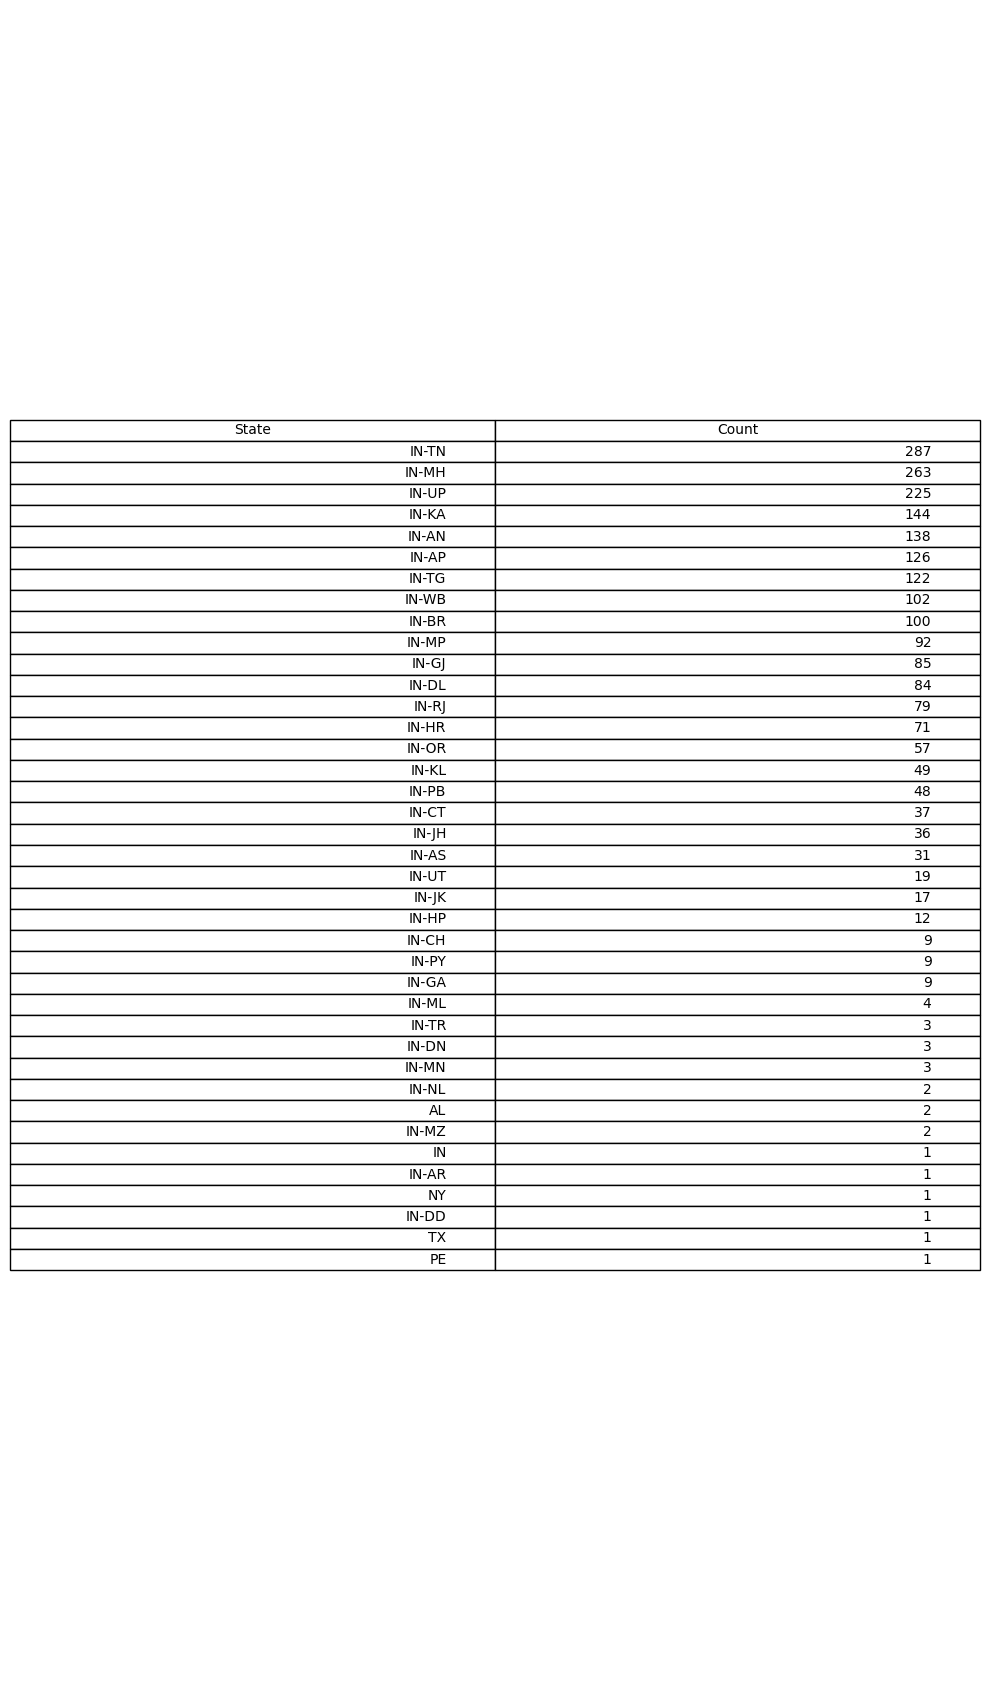

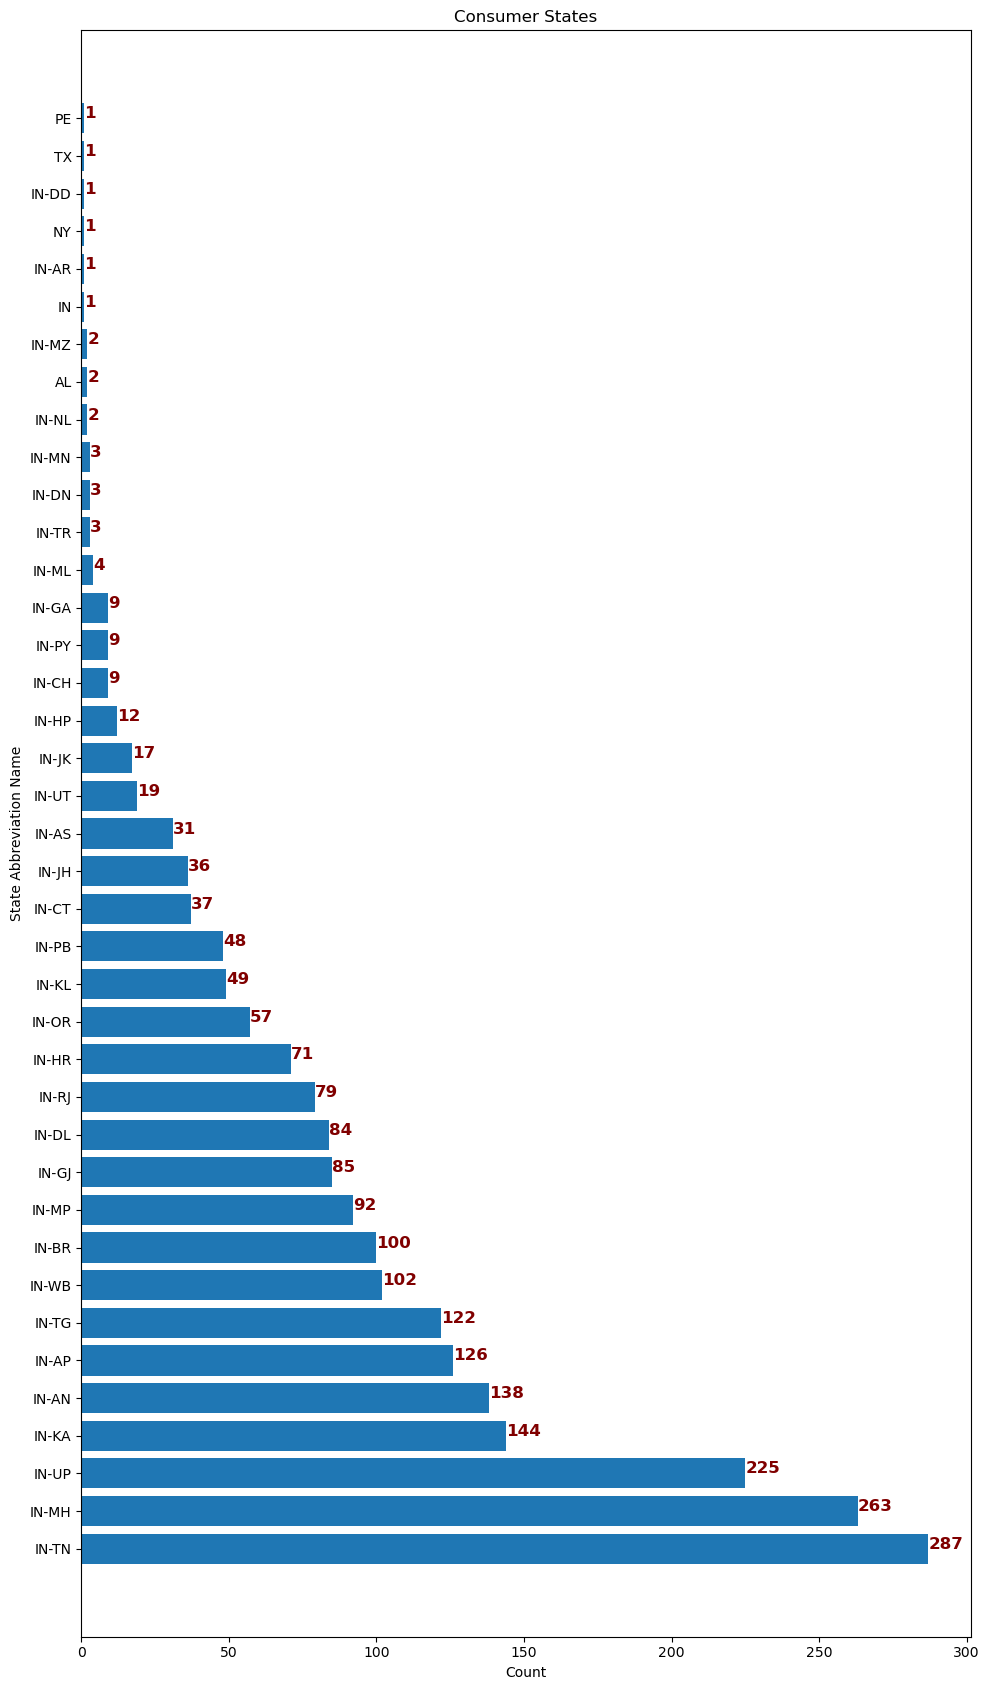

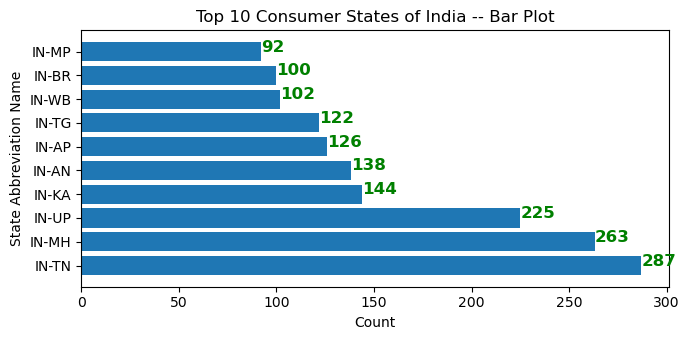

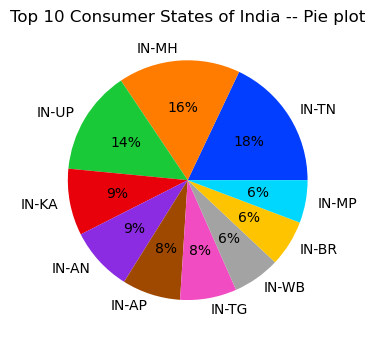

In [8]:
top_consumer_states()

## Top Consumer Cities of India

In [9]:
def top_consumer_cities():
    consumer_city_list = list(orders['Shipping_City'].value_counts().keys())
    consumer_city_list_count = orders['Shipping_City'].value_counts()
    consumer_city_df = pd.DataFrame(list(zip(consumer_city_list,consumer_city_list_count)),columns=['City','Count'])
    consumer_cities_top_df = consumer_city_df.head(10)
    i = list(consumer_cities_top_df['City'])
    j = list(consumer_cities_top_df['Count'])
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    #fig1, ax =plt.subplots(figsize=(10,17))
    #ax.axis('tight')
    #ax.axis('off')
    #the_table = ax.table(cellText=consumer_city_df.values,colLabels=consumer_city_df.columns,loc='center')
    #
    fig11, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=consumer_cities_top_df.values,colLabels=consumer_cities_top_df.columns,loc='center')
    
    fig12 = plt.figure(figsize=(12,8))
    plt.barh(i, j)
    plt.xlabel('Count')
    plt.ylabel('City Name')
    for index, value in enumerate(j):
        plt.text(value, index,
                 str(value),color = 'green', fontweight = 'bold', size=12)
    plt.title('Top 10 Consumer Cities of India')
    
    fig13 = plt.figure()
    palette_color = sns.color_palette('bright')
    plt.pie(j, labels=i, colors=palette_color, autopct='%.0f%%')
    plt.title('Top 10 Consumer Cities of India')
    
     
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("DataFrames")
    
    # create a new worksheet for figures
    fig_sheet = workbook.create_sheet("Figures")
    
    # write the figures to the worksheet
    
    for fig_idx, fig in enumerate([fig12, fig13], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        fig_sheet.add_image(img, f"A{fig_idx}")
        
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([consumer_city_df,consumer_cities_top_df], start=1):
        rows = dataframe_to_rows(consumer_cities_top_df, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
            
    workbook.save("Top_cons_cities.xlsx")
    filename = "Top Consumer Cities of India.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename) 

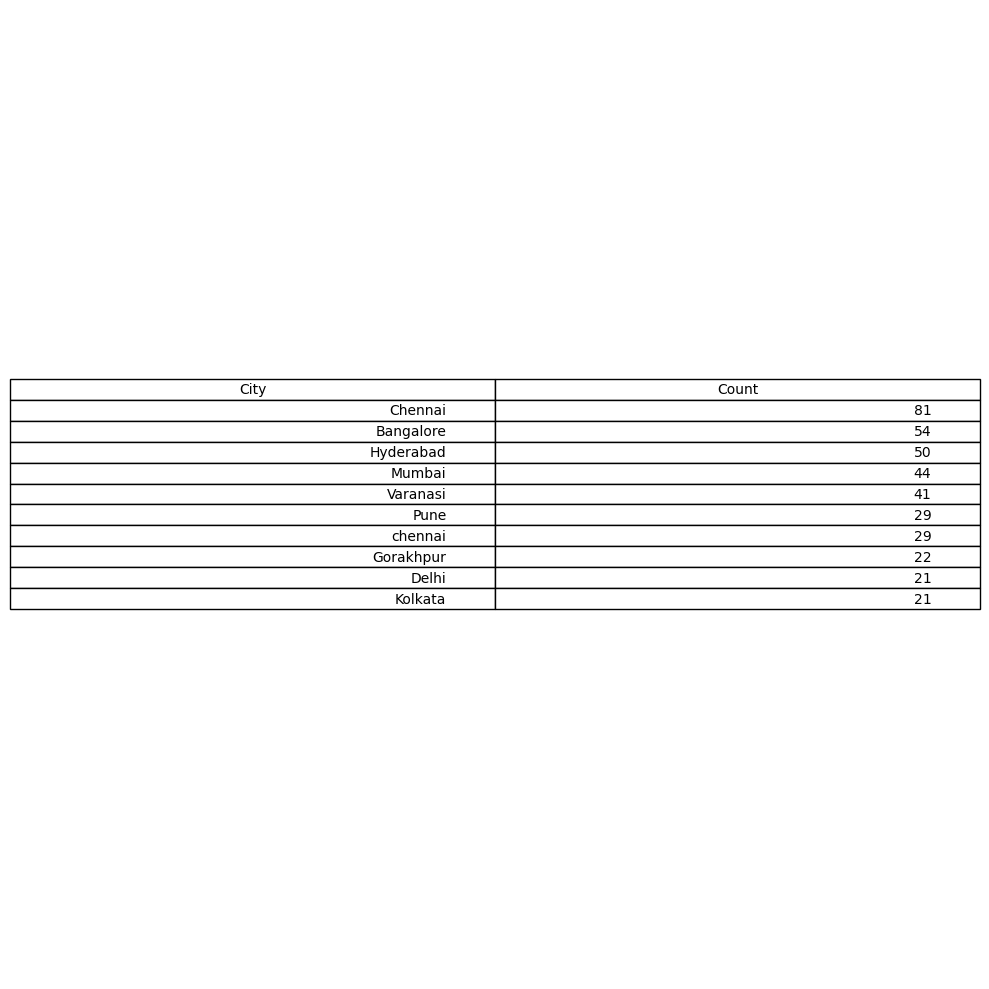

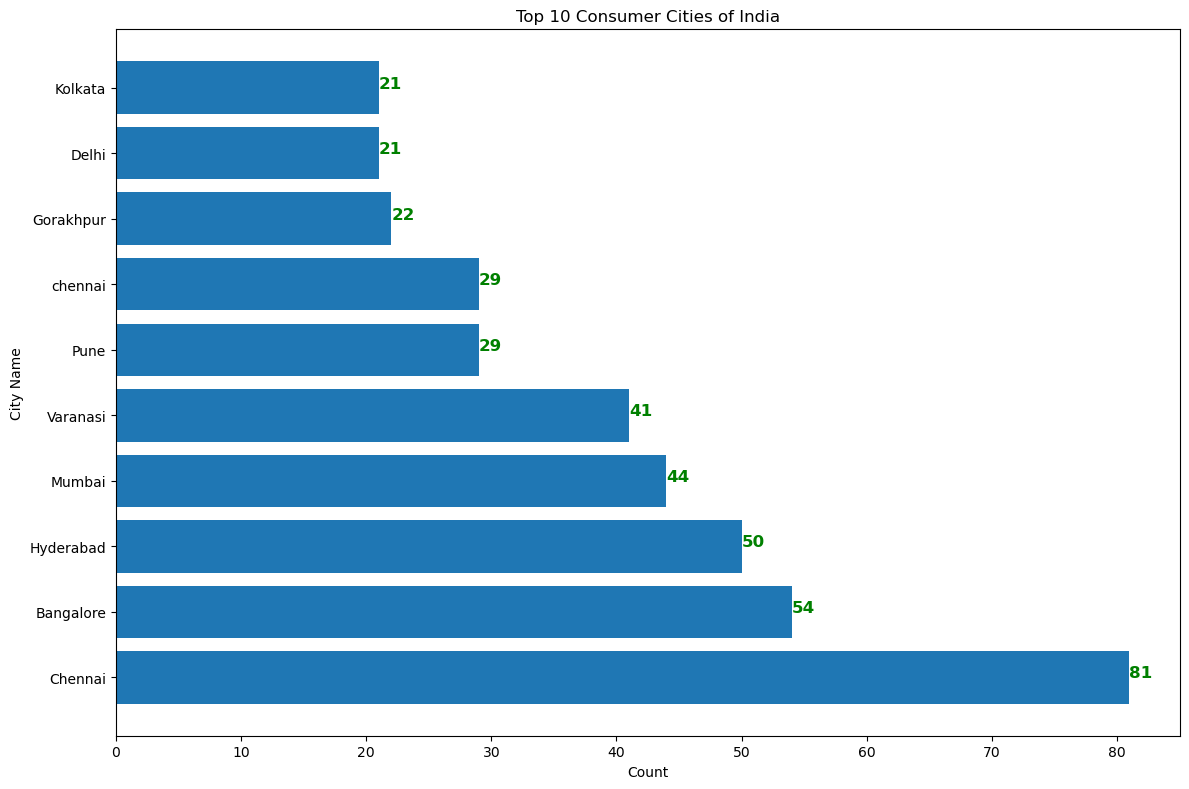

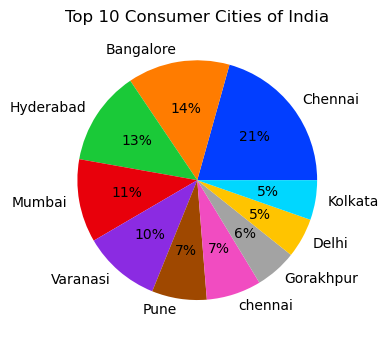

In [10]:
top_consumer_cities()

## Top Selling Product Categories

In [11]:
def top_selling_product_cat():
    product_cat_sold = list(reviews.category.value_counts().keys())
    product_cat_sold_count = list(reviews.category.value_counts())
    product_sold_df = pd.DataFrame(list(zip(product_cat_sold,product_cat_sold_count)),columns=['Product_category','Count'])
    top_25_product_sold_df = product_sold_df.head(25)
    
    k = list(top_25_product_sold_df['Product_category'])
    l = list(top_25_product_sold_df['Count'])
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    fig14, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=top_25_product_sold_df.values,colLabels=top_25_product_sold_df.columns,loc='center')
    
    fig15 = plt.figure(figsize=(12,8))
    plt.barh(k, l)
    plt.xlabel('Count')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(l):
        plt.text(value, index,
                 str(value),color = 'red', fontweight = 'bold', size=12)
    plt.title('Top 25 Selling Product Categories')
    
    fig16 = plt.figure(figsize=(12,8))
    palette_color = sns.color_palette('bright')
    plt.pie(l, labels=k, colors=palette_color, autopct='%.0f%%')
    plt.title('Top 25 Selling Products Categories')
    
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("DataFrames")
    
    # create a new worksheet for figures
    fig_sheet = workbook.create_sheet("Figures")
    
    # write the figures to the worksheet
    
    for fig_idx, fig in enumerate([fig15, fig16], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        fig_sheet.add_image(img, f"A{fig_idx}")
        
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([top_25_product_sold_df], start=1):
        rows = dataframe_to_rows(top_25_product_sold_df, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
            
    workbook.save("TopProductsCategories.xlsx")
    
    
    filename = "Top 25 Selling Products Categories.pdf"
    def save_image(filename):
        
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
        
    # call the function
    save_image(filename) 
        

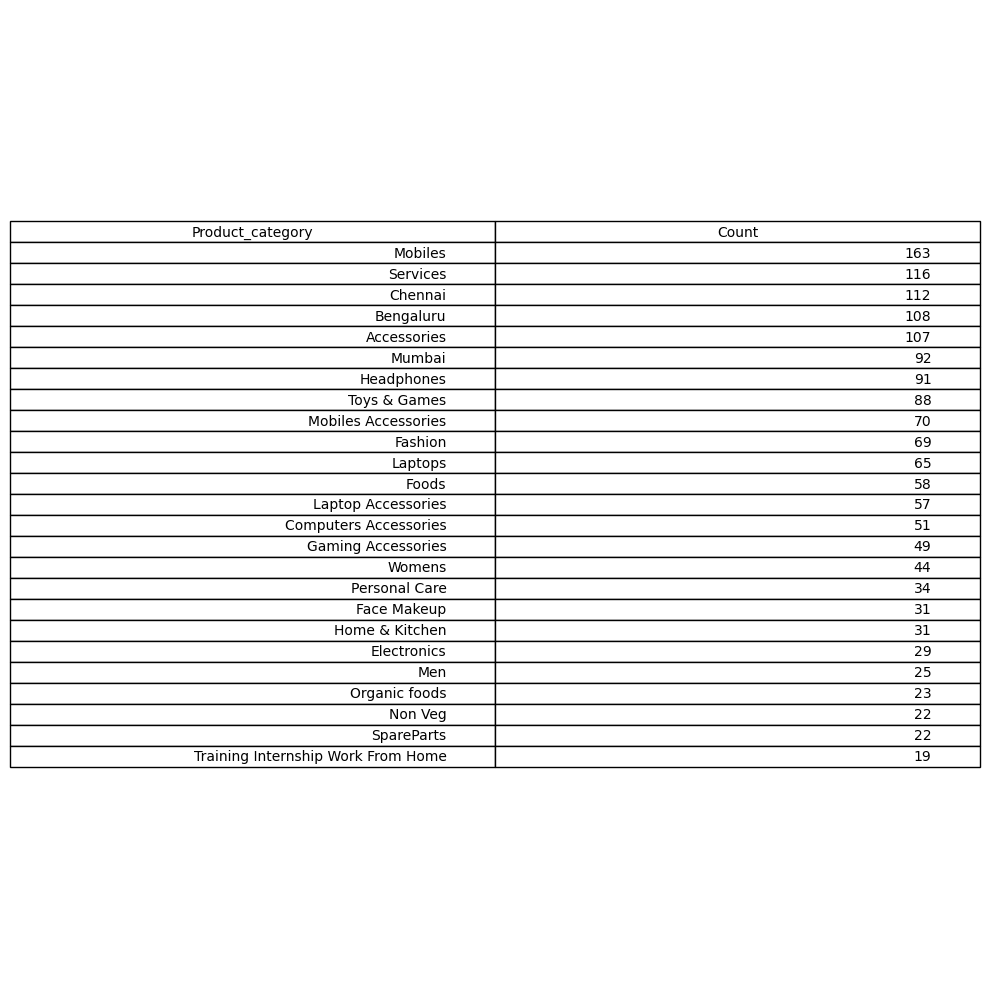

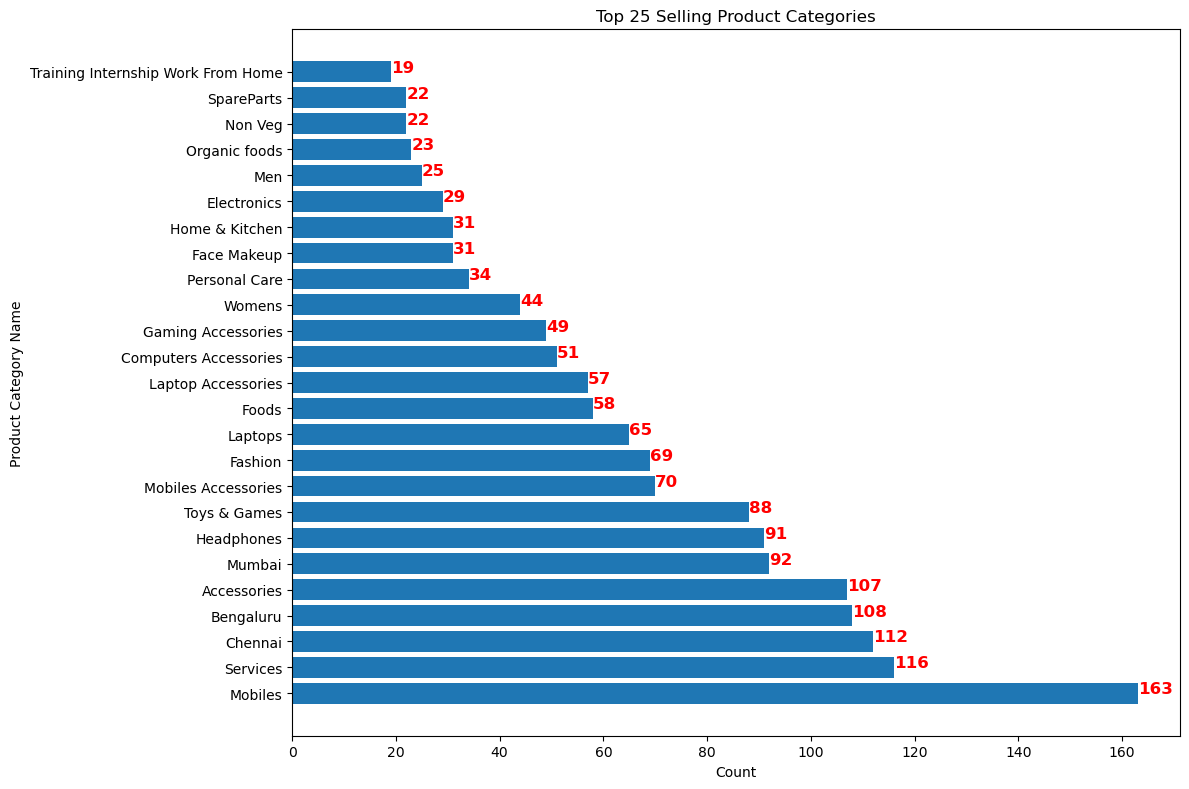

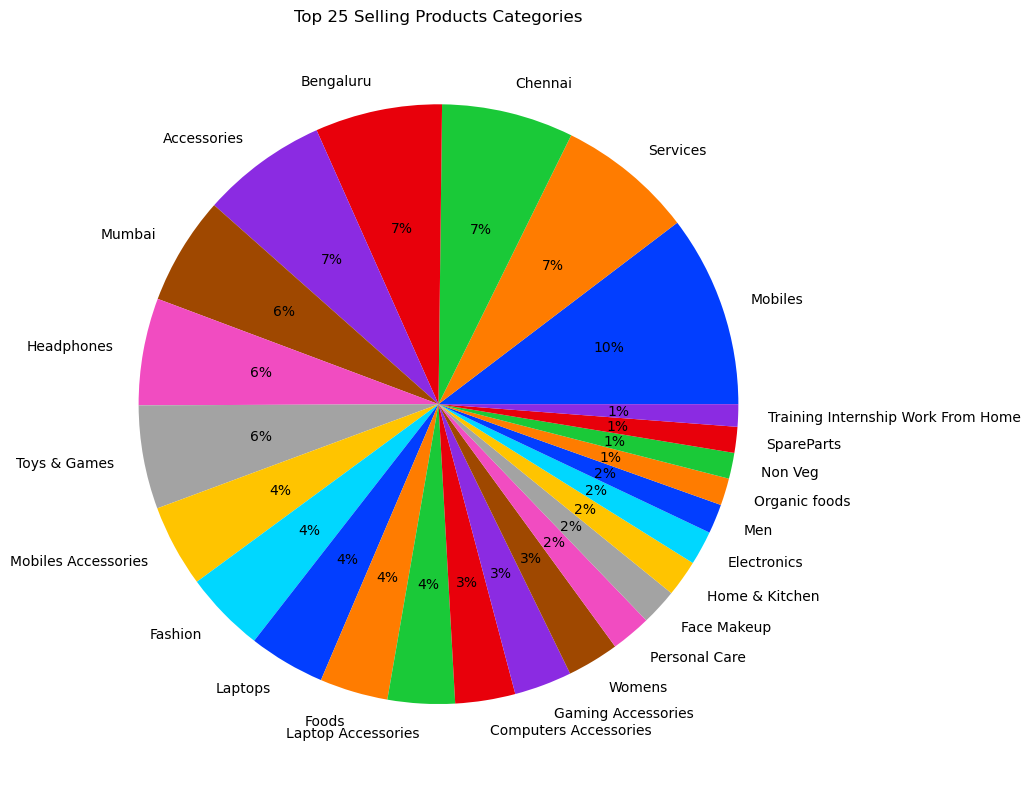

In [12]:
top_selling_product_cat()

## Reviews for All Product Categories

In [13]:
def reviews_all_cat():
    product_cat_review = list(reviews.category.value_counts().keys())
    product_cat_review_count = list(reviews.category.value_counts())
    product_cat_stars = list(reviews.stars.value_counts().keys())
    product_cat_stars_count = list(reviews.stars.value_counts())
    product_cat_star = pd.DataFrame(list(zip(list(reviews.category),list(reviews.stars))), columns=['category','stars'])
    product_sold_review_df = product_cat_star.pivot_table(index='category', columns='stars', aggfunc='size', fill_value=0)
    
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    
    fig17, ax =plt.subplots(figsize=(15,17))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=product_sold_review_df.values,colLabels=product_sold_review_df.columns,rowLabels=product_sold_review_df.index,loc='center')
    
    fig18 = plt.figure(figsize=(10,17))
    m = list(product_sold_review_df.index)
    n = list(product_sold_review_df['2.3 star rating'])
    plt.barh(m, n)
    plt.xlabel('Count of 2.3 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(n):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('2.3 star rating V/S Product Categories')
    
    fig19 = plt.figure(figsize=(10,17))
    o = list(product_sold_review_df.index)
    p = list(product_sold_review_df['3.0 star rating'])
    plt.barh(o, p)
    plt.xlabel('Count of 3.0 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(p):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('3.0 star rating V/S Product Categories')
    
    fig20 = plt.figure(figsize=(10,17))
    q = list(product_sold_review_df.index)
    r = list(product_sold_review_df['3.3 star rating'])
    plt.barh(q, r)
    plt.xlabel('Count of 3.3 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(r):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('3.3 star rating V/S Product Categories')
    
    fig21 = plt.figure(figsize=(10,17))
    s = list(product_sold_review_df.index)
    t = list(product_sold_review_df['4.0 star rating'])
    plt.barh(s, t)
    plt.xlabel('Count of 4.0 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(t):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.0 star rating V/S Product Categories')
    
    fig22 = plt.figure(figsize=(10,17))
    u = list(product_sold_review_df.index)
    v = list(product_sold_review_df['4.2 star rating'])
    plt.barh(u,v)
    plt.xlabel('Count of 4.2 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(v):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.2 star rating V/S Product Categories')
    
    fig23 = plt.figure(figsize=(10,17))
    w = list(product_sold_review_df.index)
    x = list(product_sold_review_df['4.3 star rating'])
    plt.barh(w,x)
    plt.xlabel('Count of 4.3 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(x):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.3 star rating V/S Product Categories')
    
    fig24 = plt.figure(figsize=(10,17))
    y = list(product_sold_review_df.index)
    z = list(product_sold_review_df['4.5 star rating'])
    plt.barh(y,z)
    plt.xlabel('Count of 4.5 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(z):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.5 star rating V/S Product Categories')
    
    fig25 = plt.figure(figsize=(10,17))
    a = list(product_sold_review_df.index)
    b = list(product_sold_review_df['4.6 star rating'])
    plt.barh(a,b)
    plt.xlabel('Count of 4.6 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(b):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.6 star rating V/S Product Categories')
    
    fig26 = plt.figure(figsize=(10,17))
    c = list(product_sold_review_df.index)
    d = list(product_sold_review_df['4.7 star rating'])
    plt.barh(c,d)
    plt.xlabel('Count of 4.7 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(d):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.7 star rating V/S Product Categories')
    
    fig27 = plt.figure(figsize=(10,17))
    e = list(product_sold_review_df.index)
    f = list(product_sold_review_df['4.7 star rating'])
    plt.barh(e,f)
    plt.xlabel('Count of 4.8 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(f):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.8 star rating V/S Product Categories')
    
    fig28 = plt.figure(figsize=(10,17))
    g = list(product_sold_review_df.index)
    h = list(product_sold_review_df['4.9 star rating'])
    plt.barh(g,h)
    plt.xlabel('Count of 4.9 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(h):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('4.9 star rating V/S Product Categories')
    
    fig29 = plt.figure(figsize=(10,17))
    i = list(product_sold_review_df.index)
    j = list(product_sold_review_df['5.0 star rating'])
    plt.barh(i,j)
    plt.xlabel('Count of 5.0 Star Rating given')
    plt.ylabel('Product Category Name')
    for index, value in enumerate(j):
        plt.text(value, index,
                 str(value),color = 'maroon', fontweight = 'bold', size=12)
    plt.title('5.0 star rating V/S Product Categories')
    
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("DataFrames")
    
    # create a new worksheet for figures
    fig_sheet = workbook.create_sheet("Figures")
    
    # write the figures to the worksheet
    
    for fig_idx, fig in enumerate([fig18, fig19, fig20, fig21, fig22, fig23, fig24, fig25, fig26, fig27, fig28, fig29], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        fig_sheet.add_image(img, f"A{fig_idx}")
    
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([product_sold_review_df], start=1):
        rows = dataframe_to_rows(product_sold_review_df, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet.cell(row=r_idx, column=3+df_idx).value = row[2]
            df_sheet.cell(row=r_idx, column=4+df_idx).value = row[3]
            df_sheet.cell(row=r_idx, column=5+df_idx).value = row[4]
            df_sheet.cell(row=r_idx, column=6+df_idx).value = row[5]
            df_sheet.cell(row=r_idx, column=7+df_idx).value = row[6]
            df_sheet.cell(row=r_idx, column=8+df_idx).value = row[7]
            df_sheet.cell(row=r_idx, column=9+df_idx).value = row[8]
            df_sheet.cell(row=r_idx, column=10+df_idx).value = row[9]
            df_sheet.cell(row=r_idx, column=11+df_idx).value = row[10]
            df_sheet.cell(row=r_idx, column=12+df_idx).value = row[11]
           
            
    workbook.save("ReviewsProductCategories.xlsx")
    
    
    filename = "Reviews for All Product Categories.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename) 

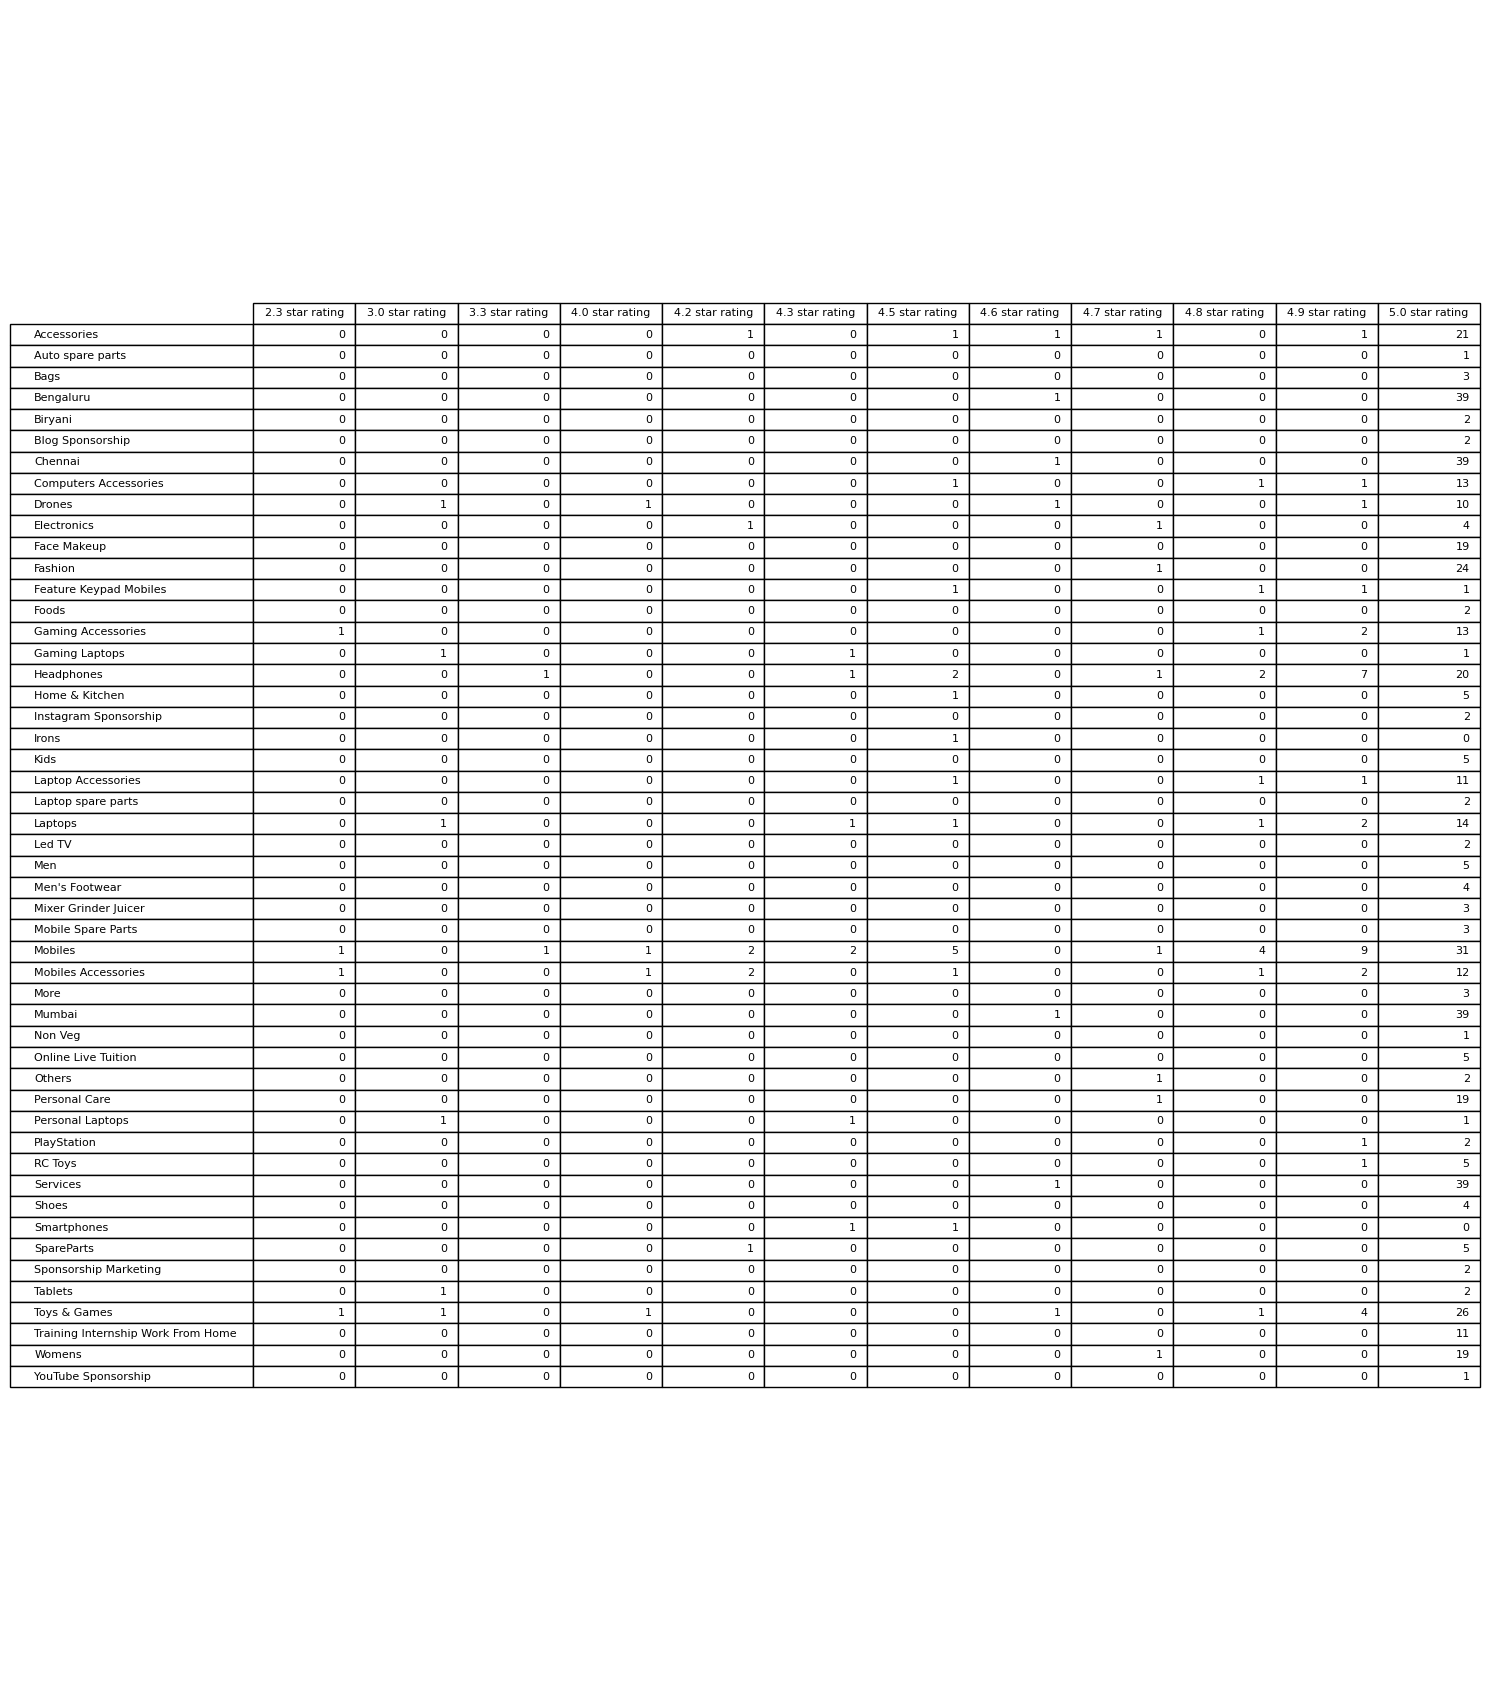

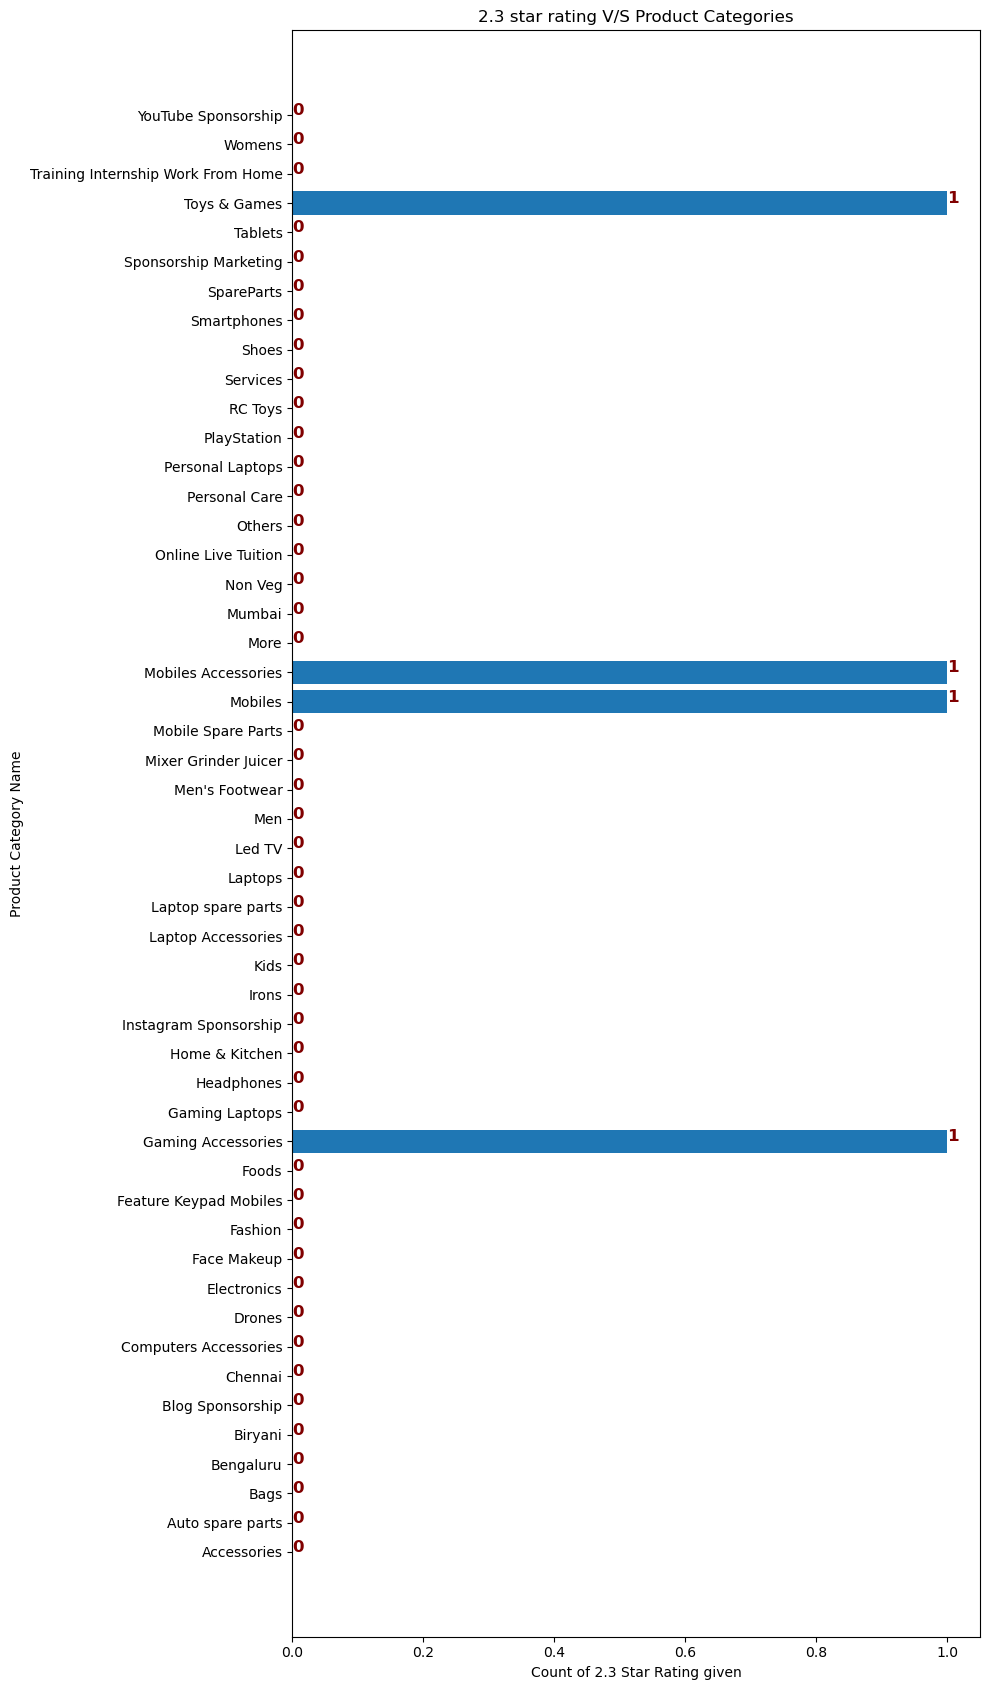

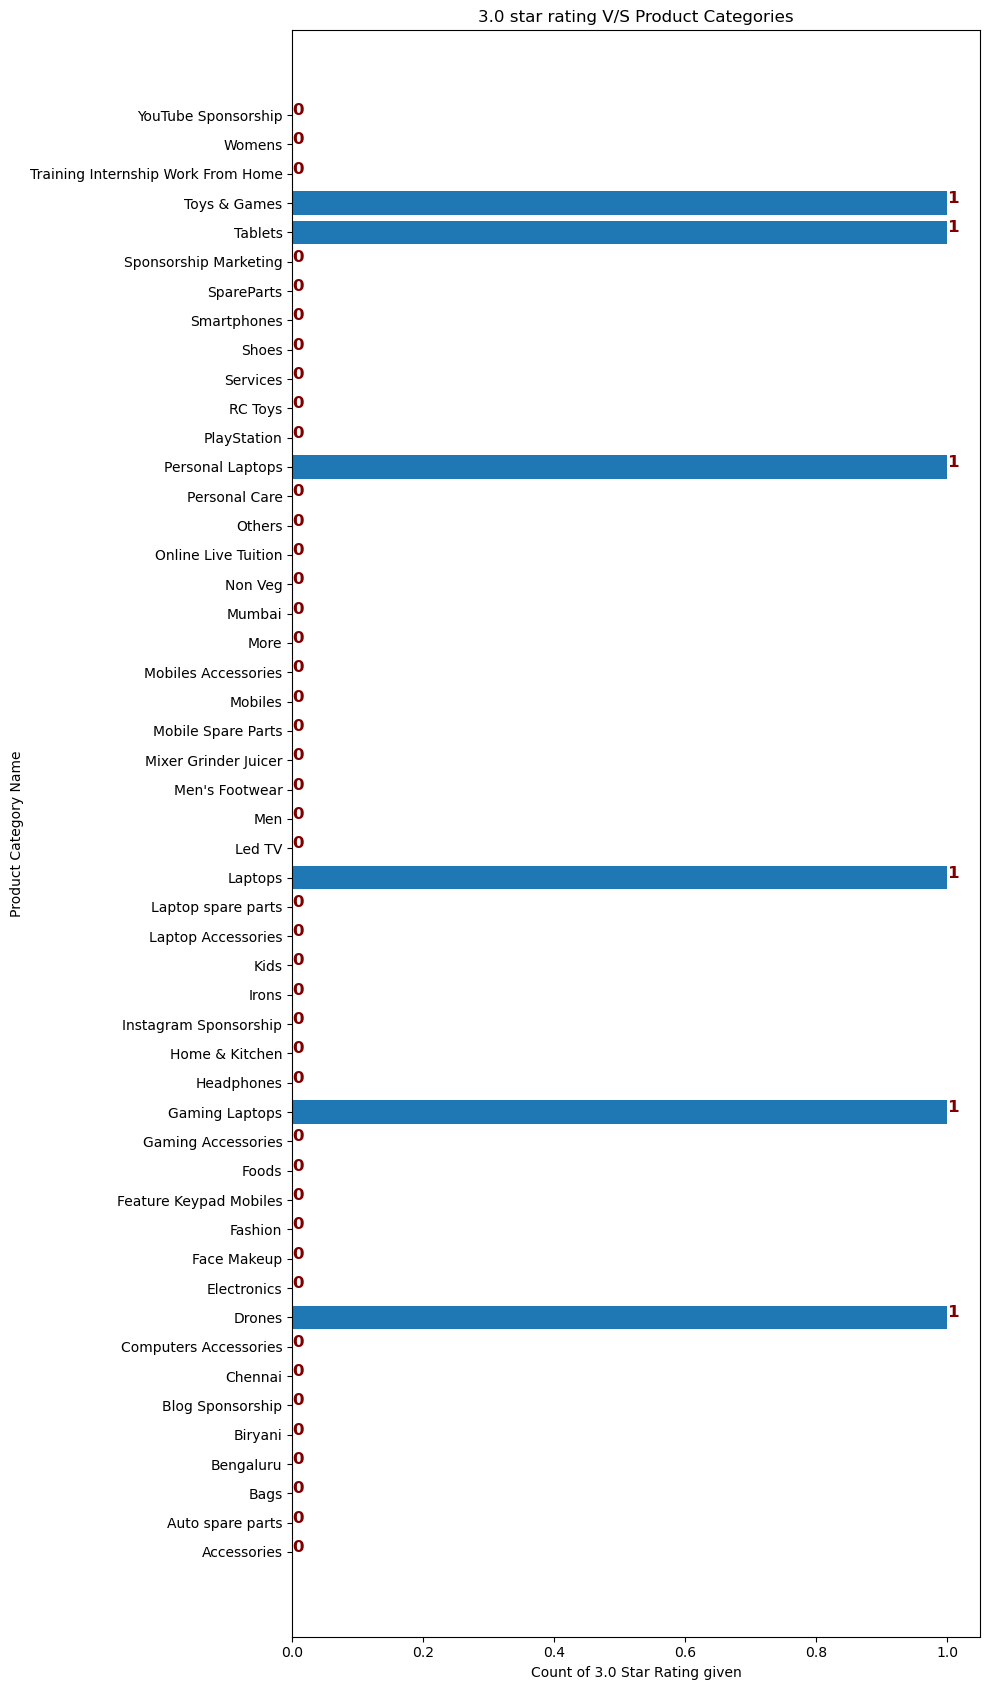

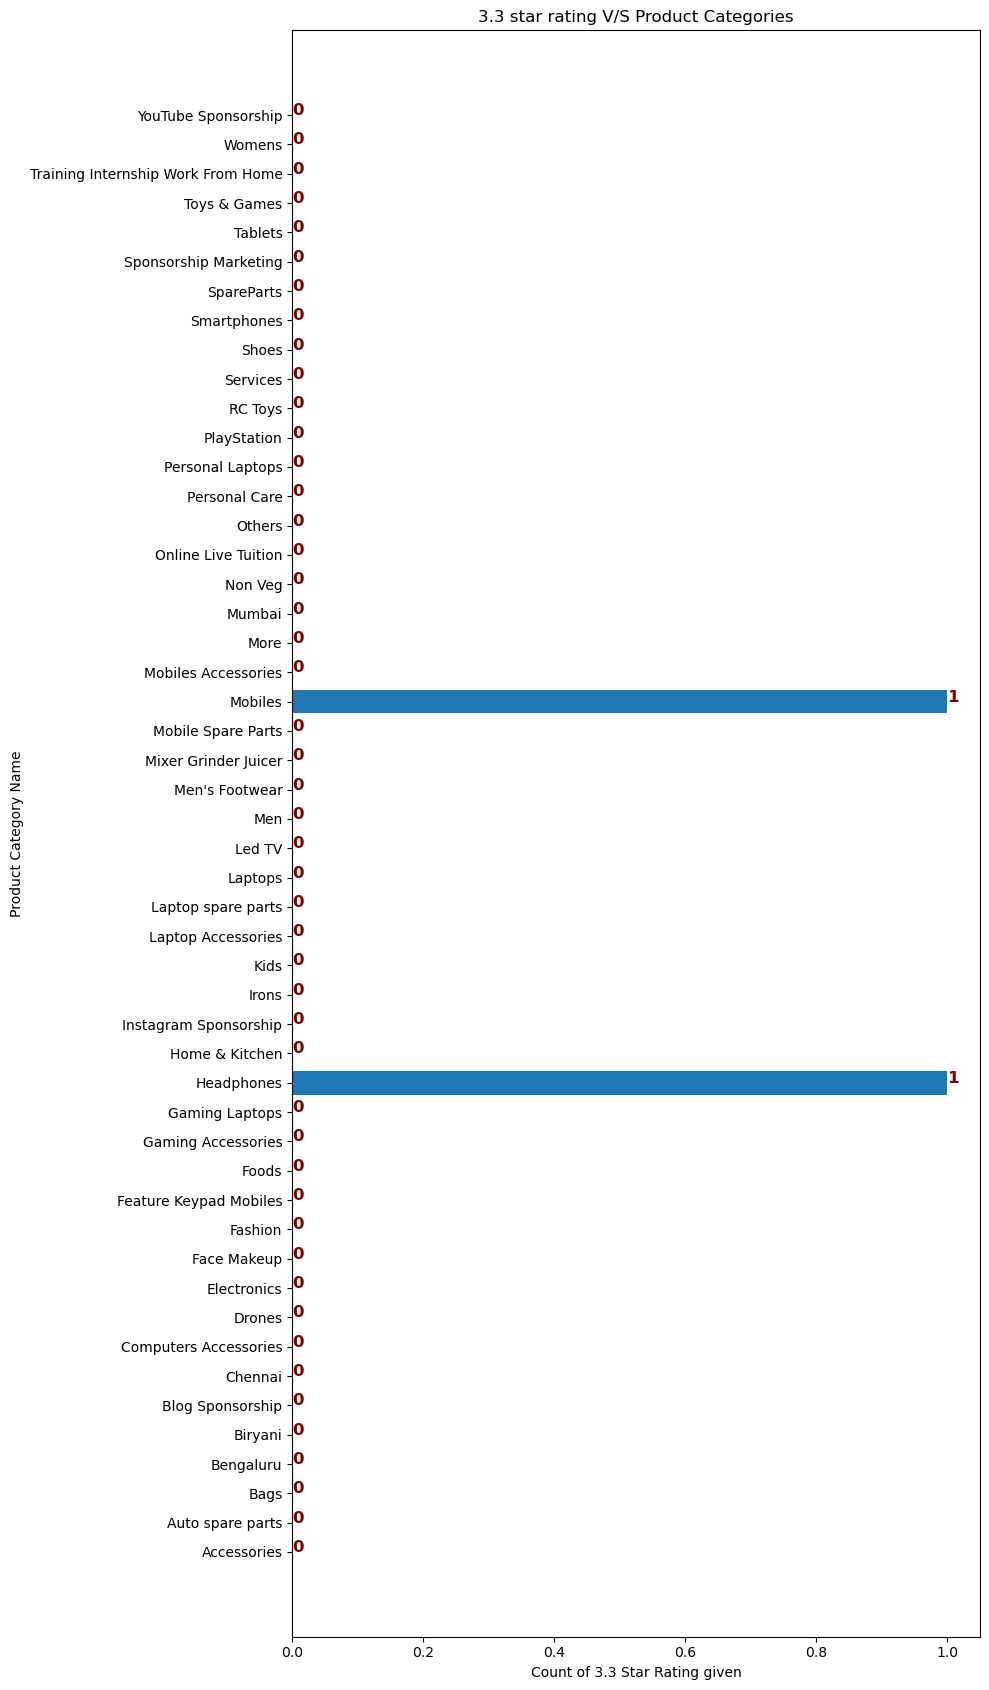

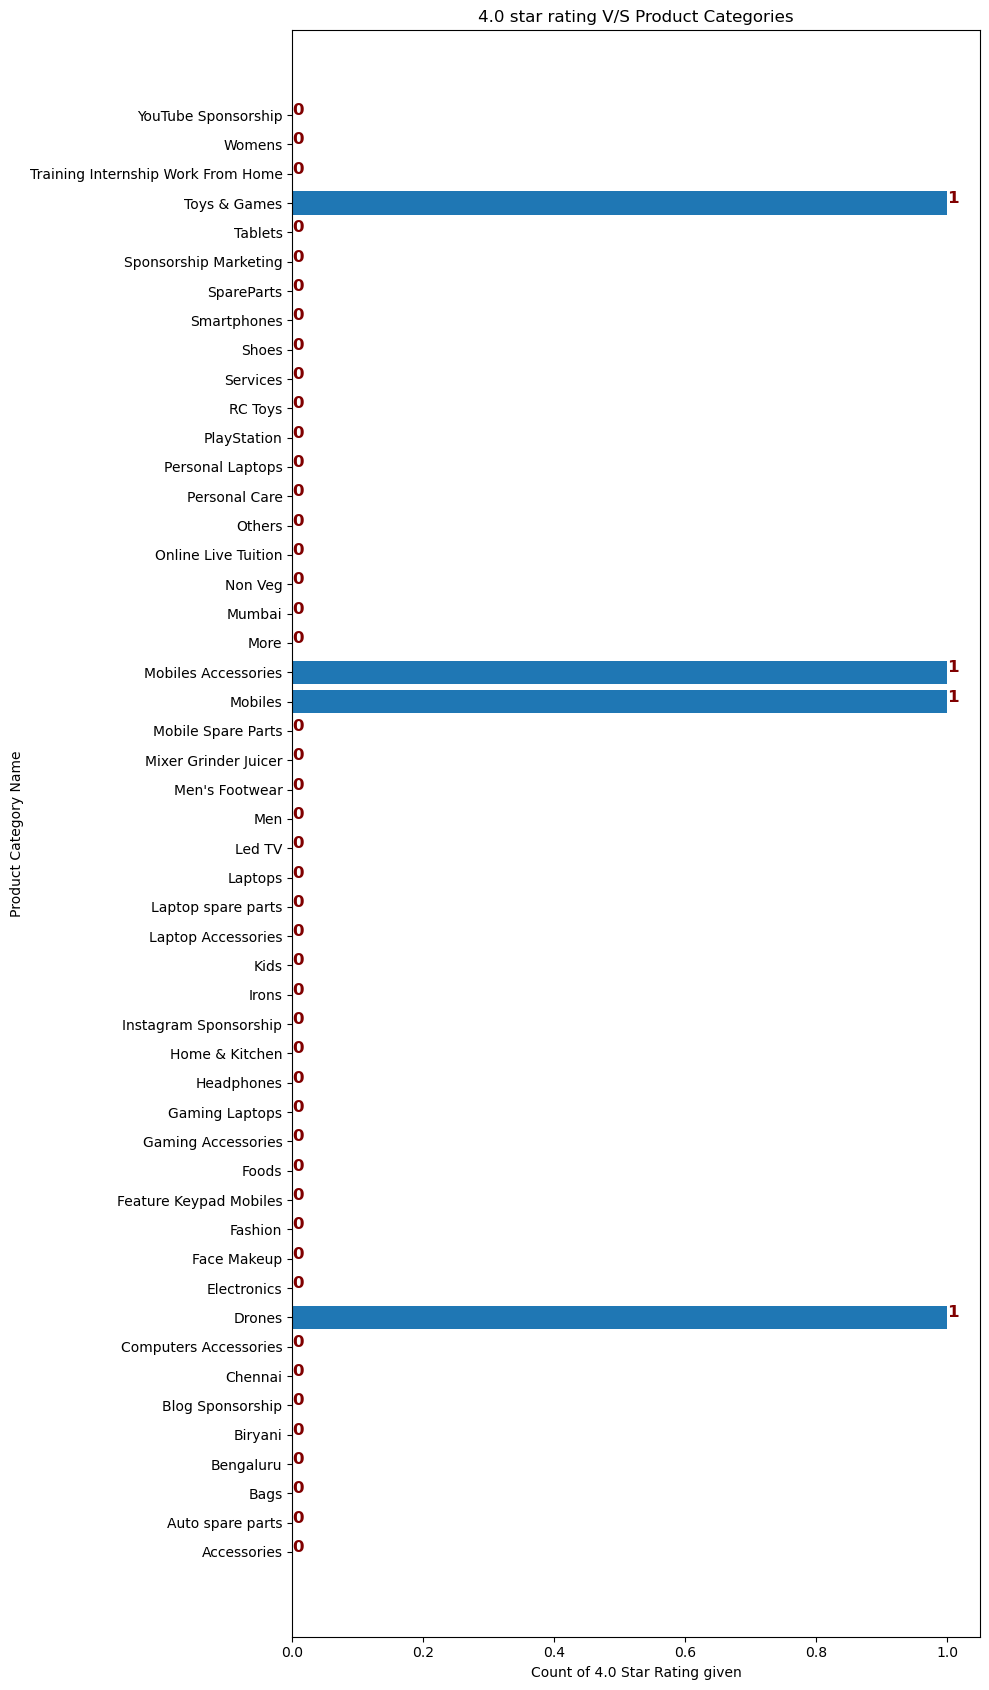

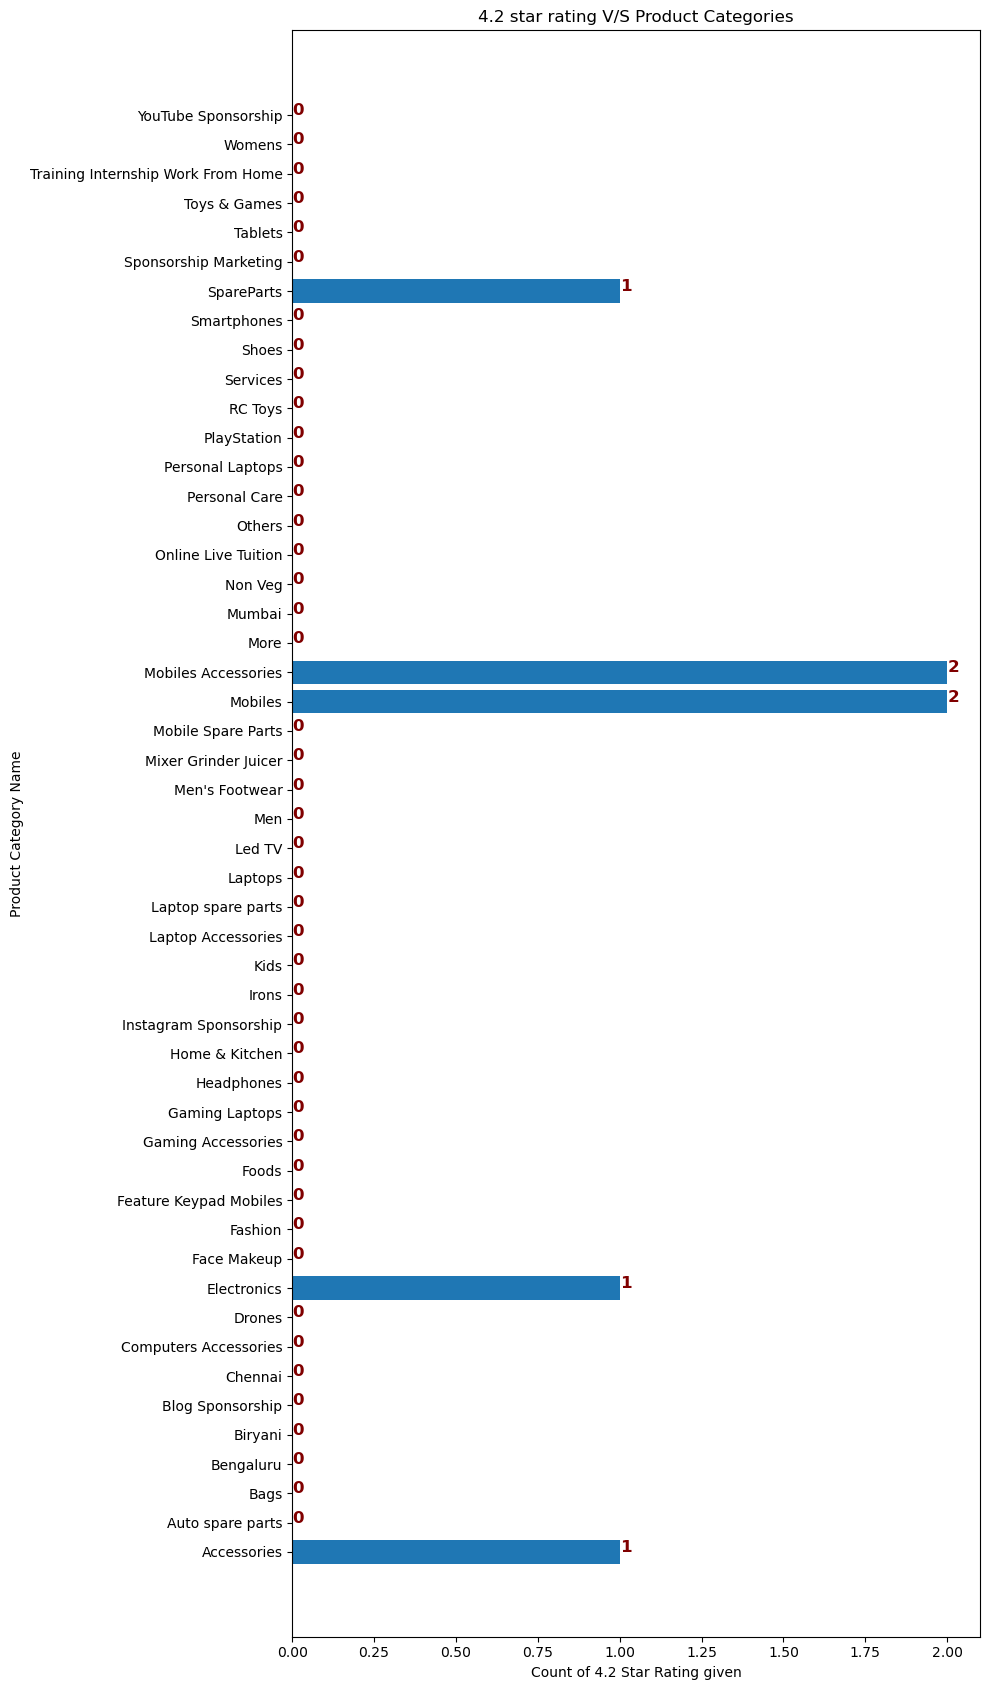

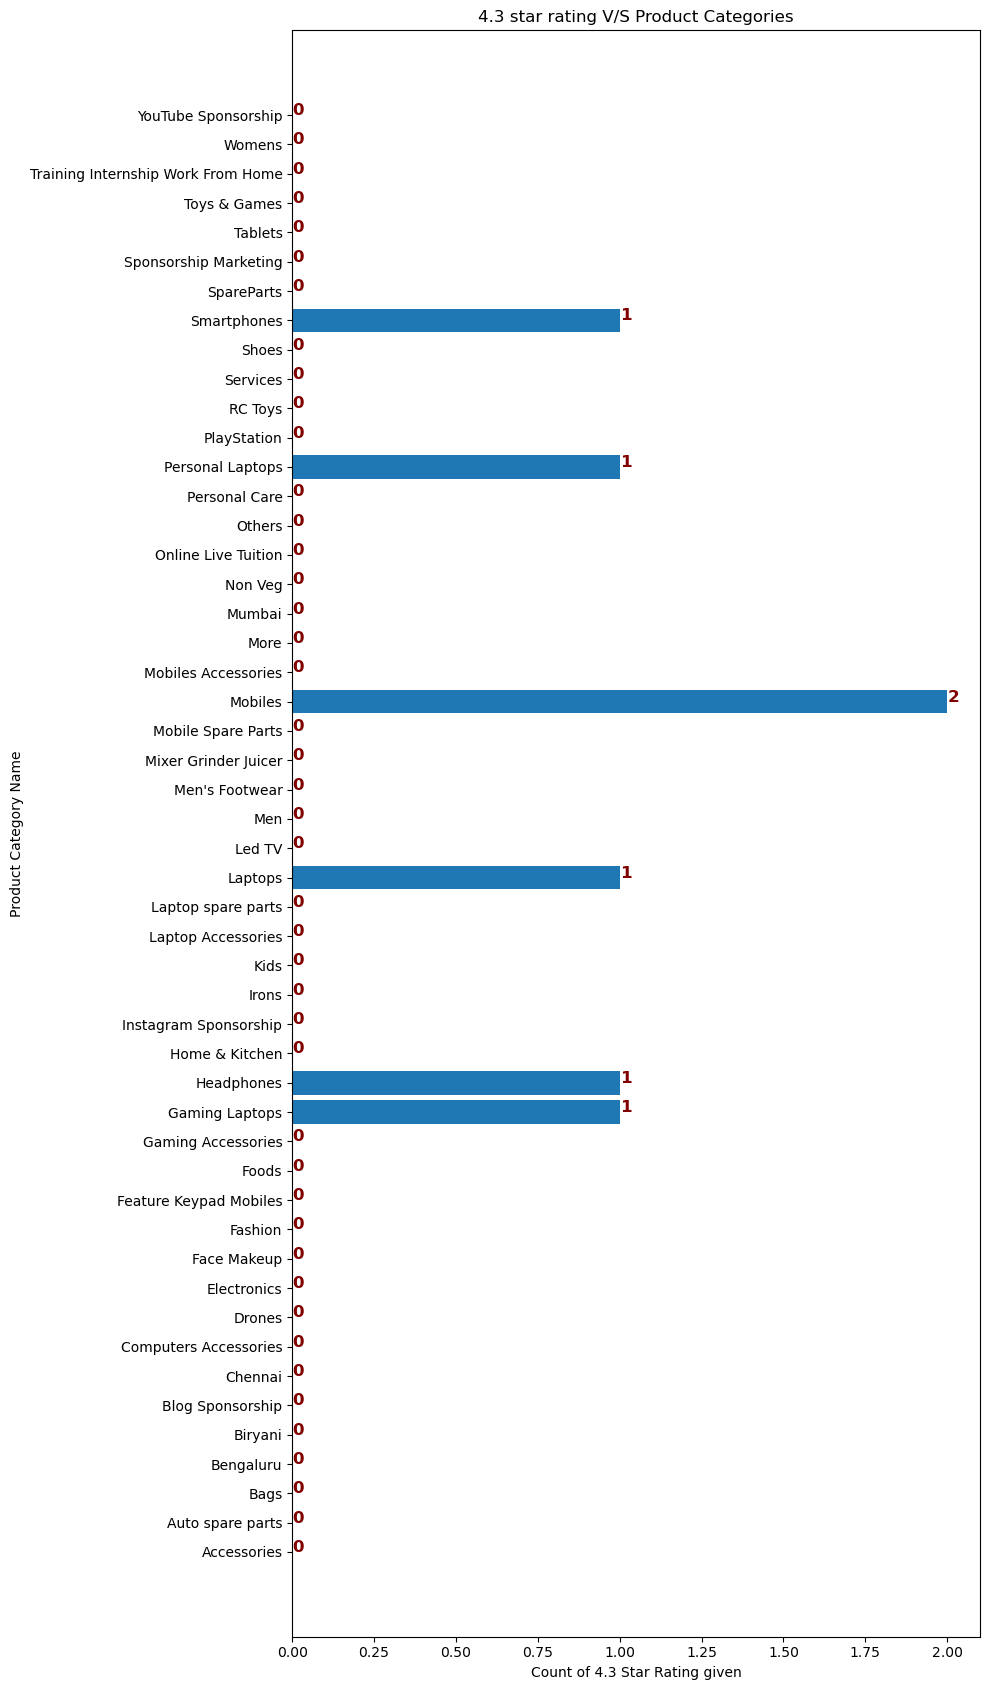

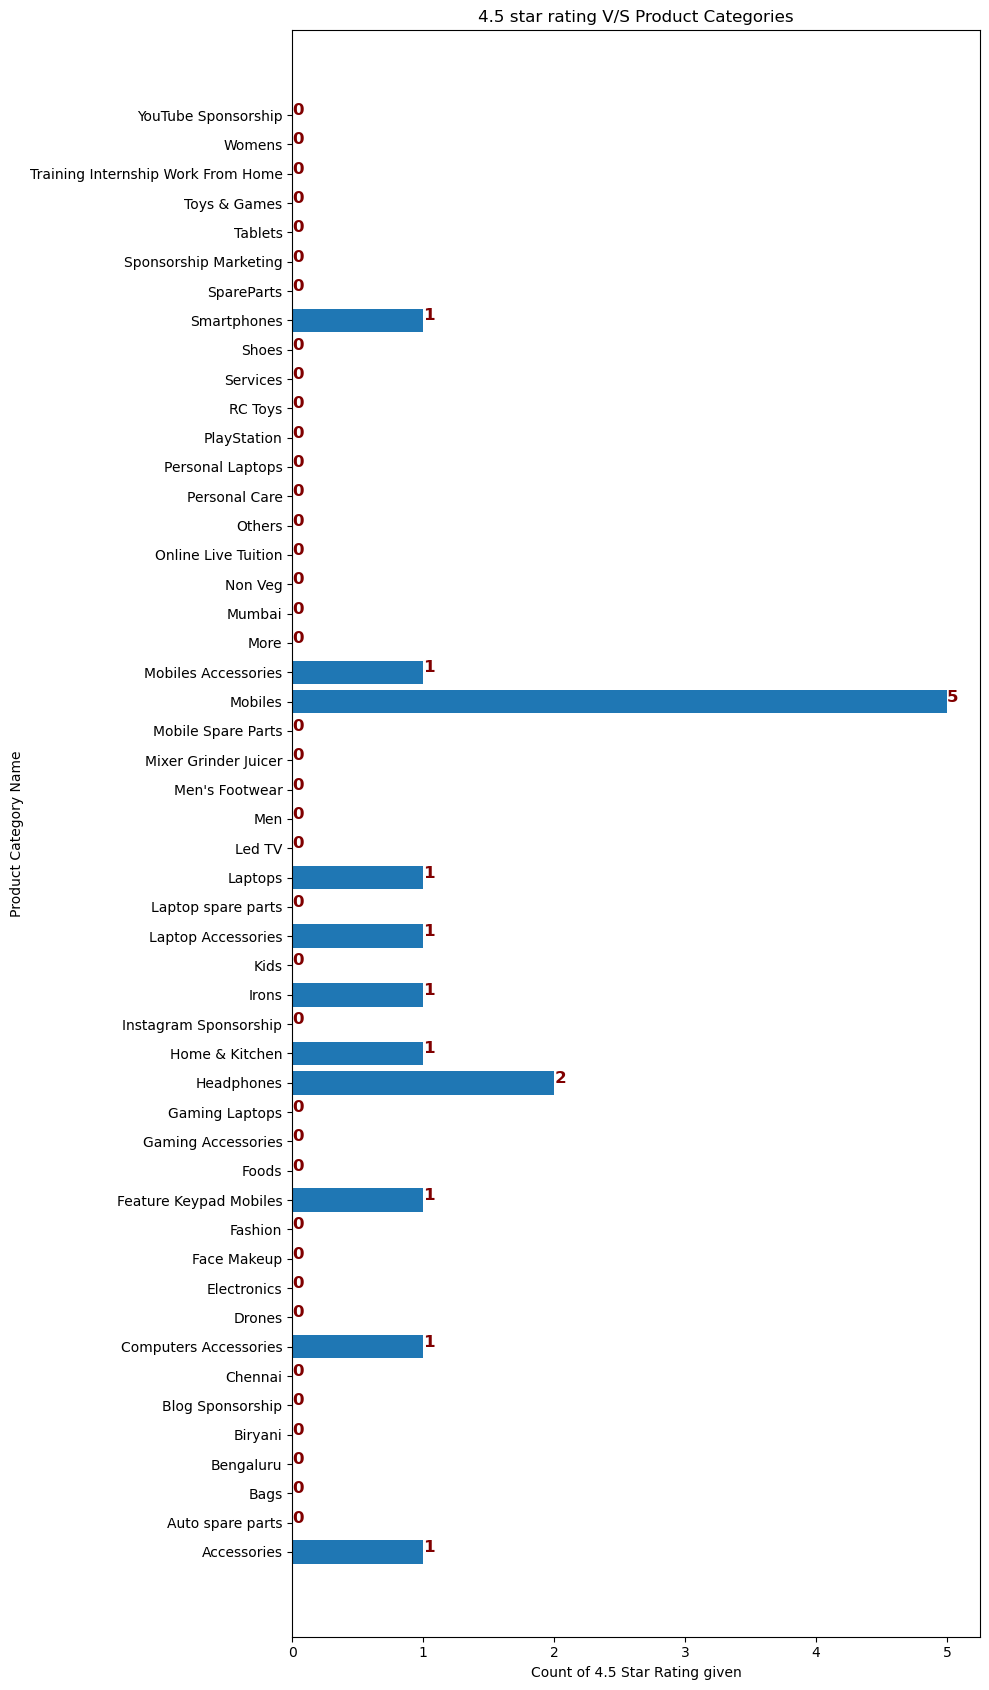

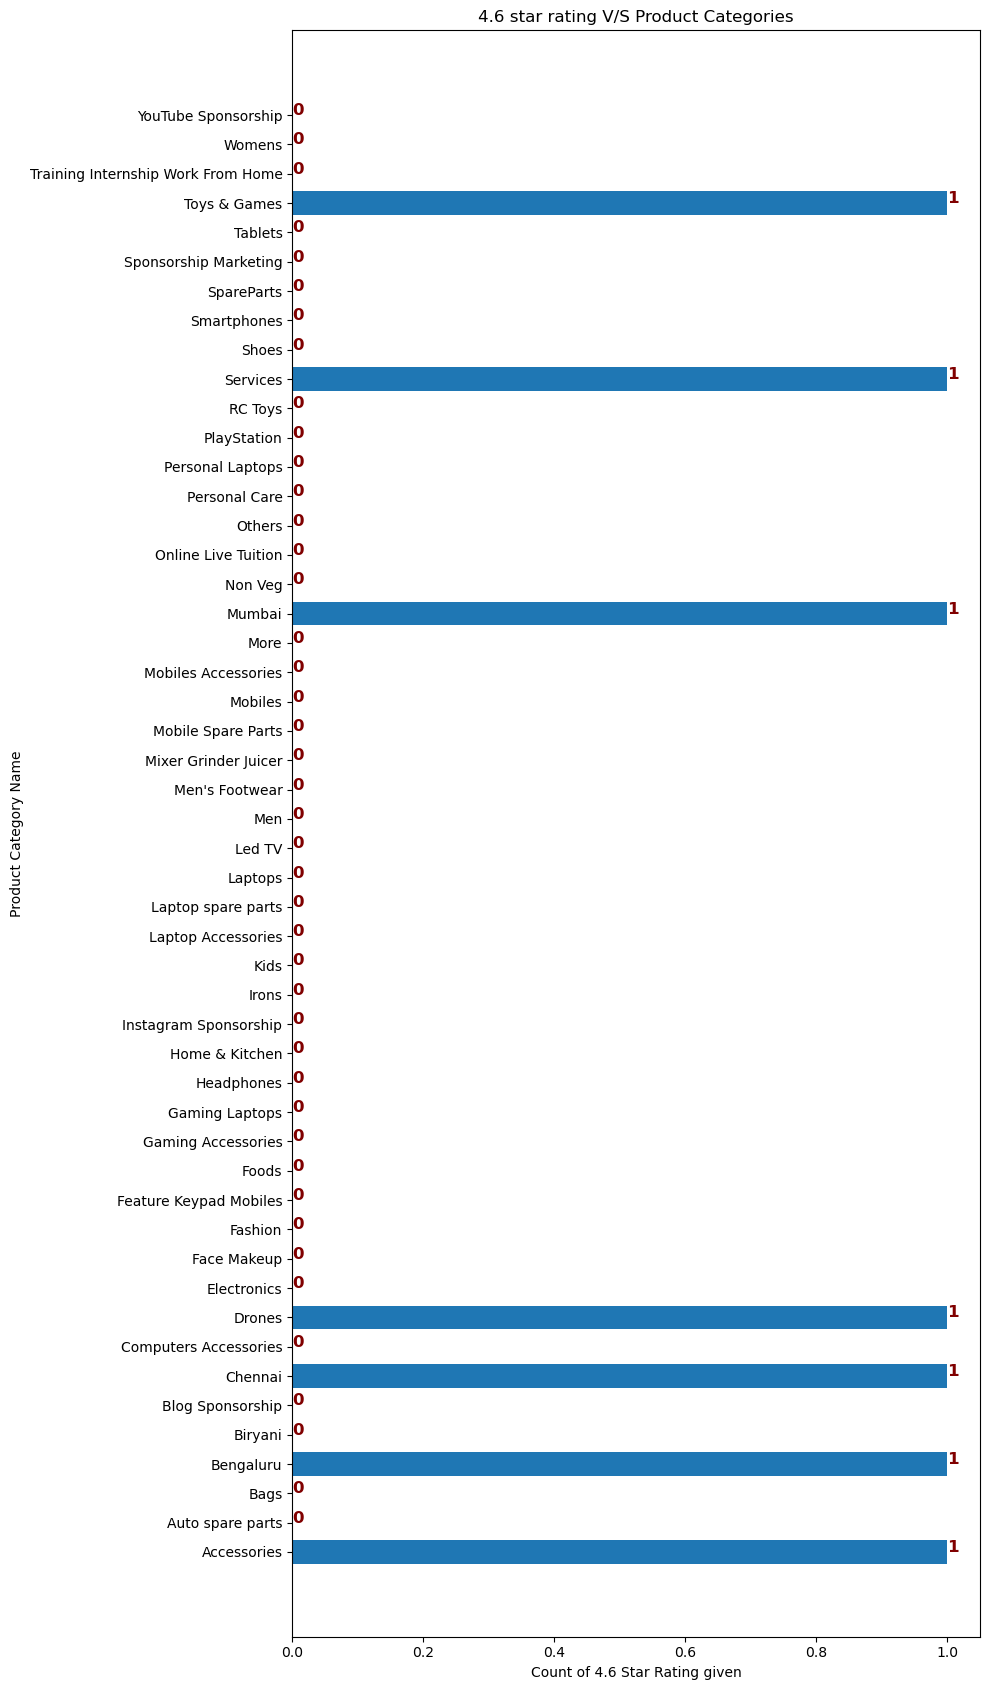

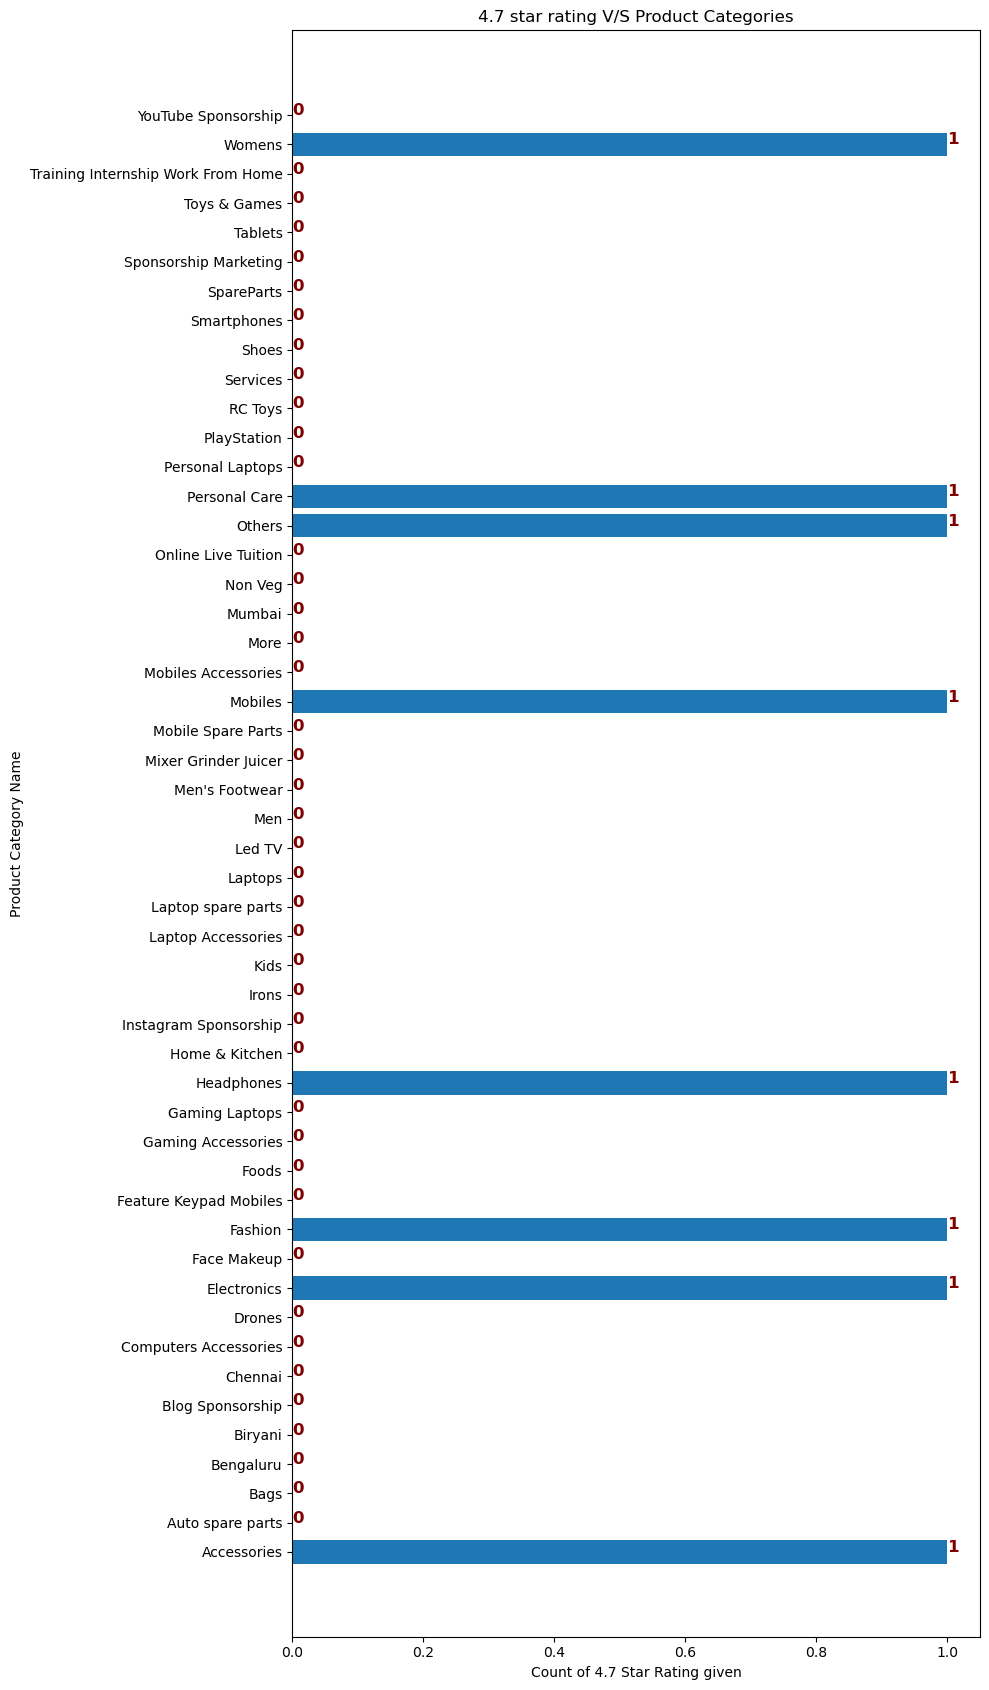

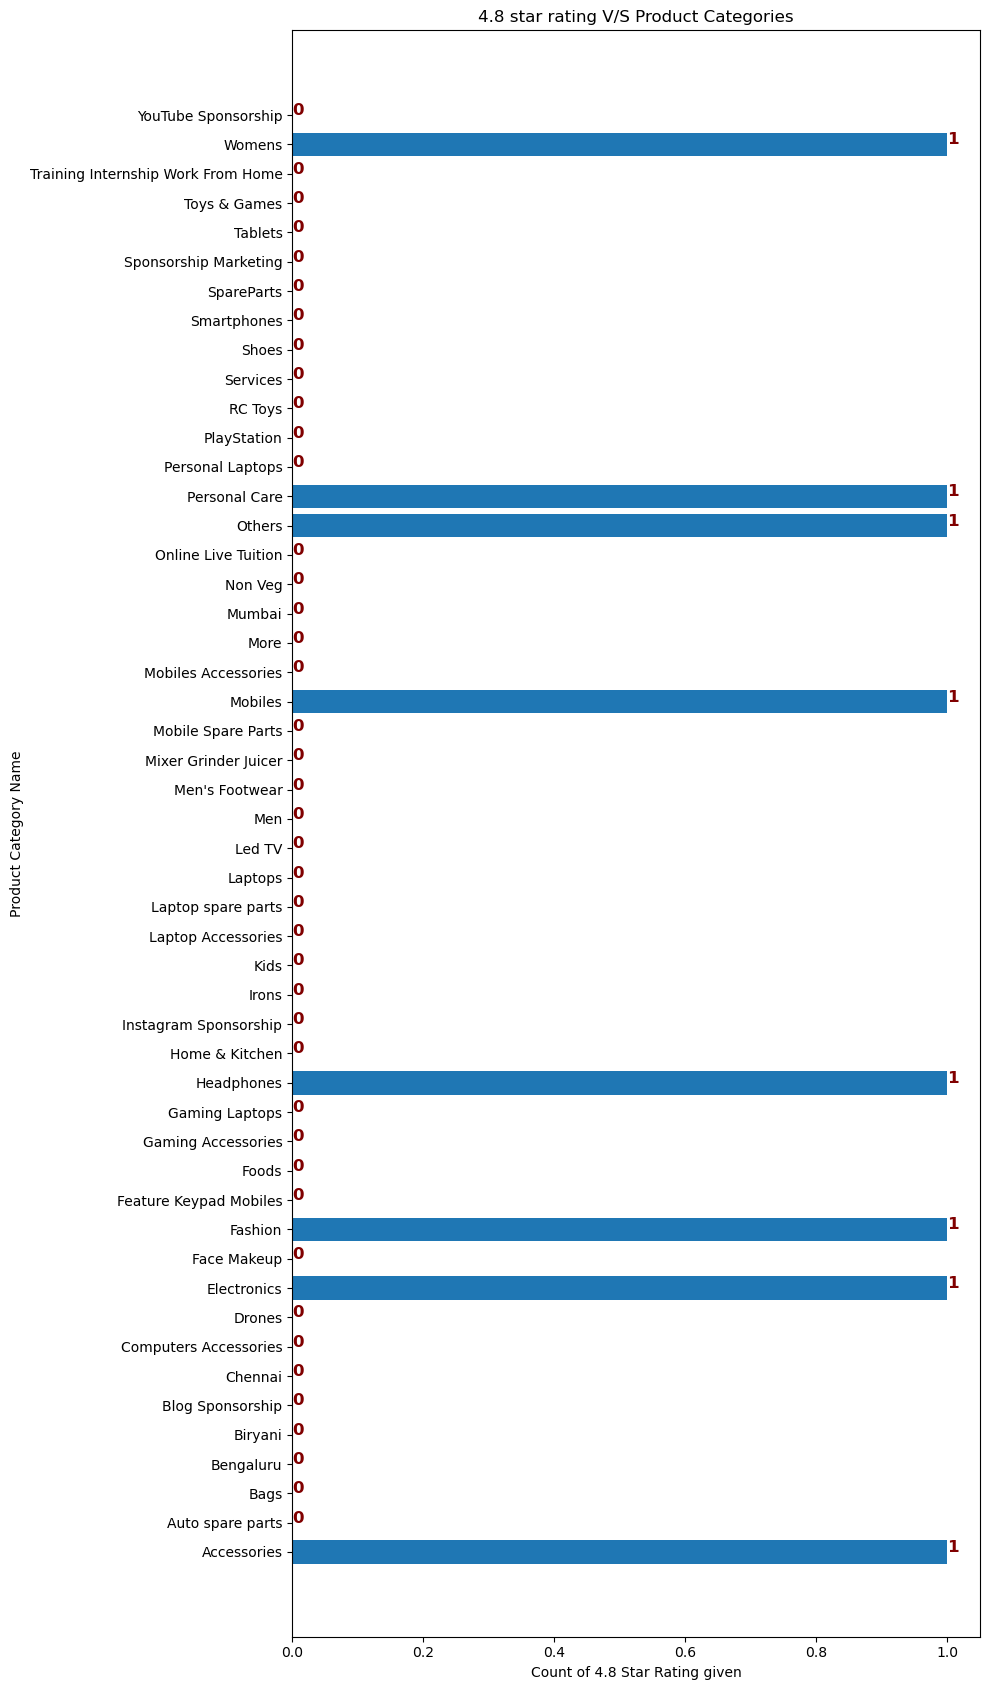

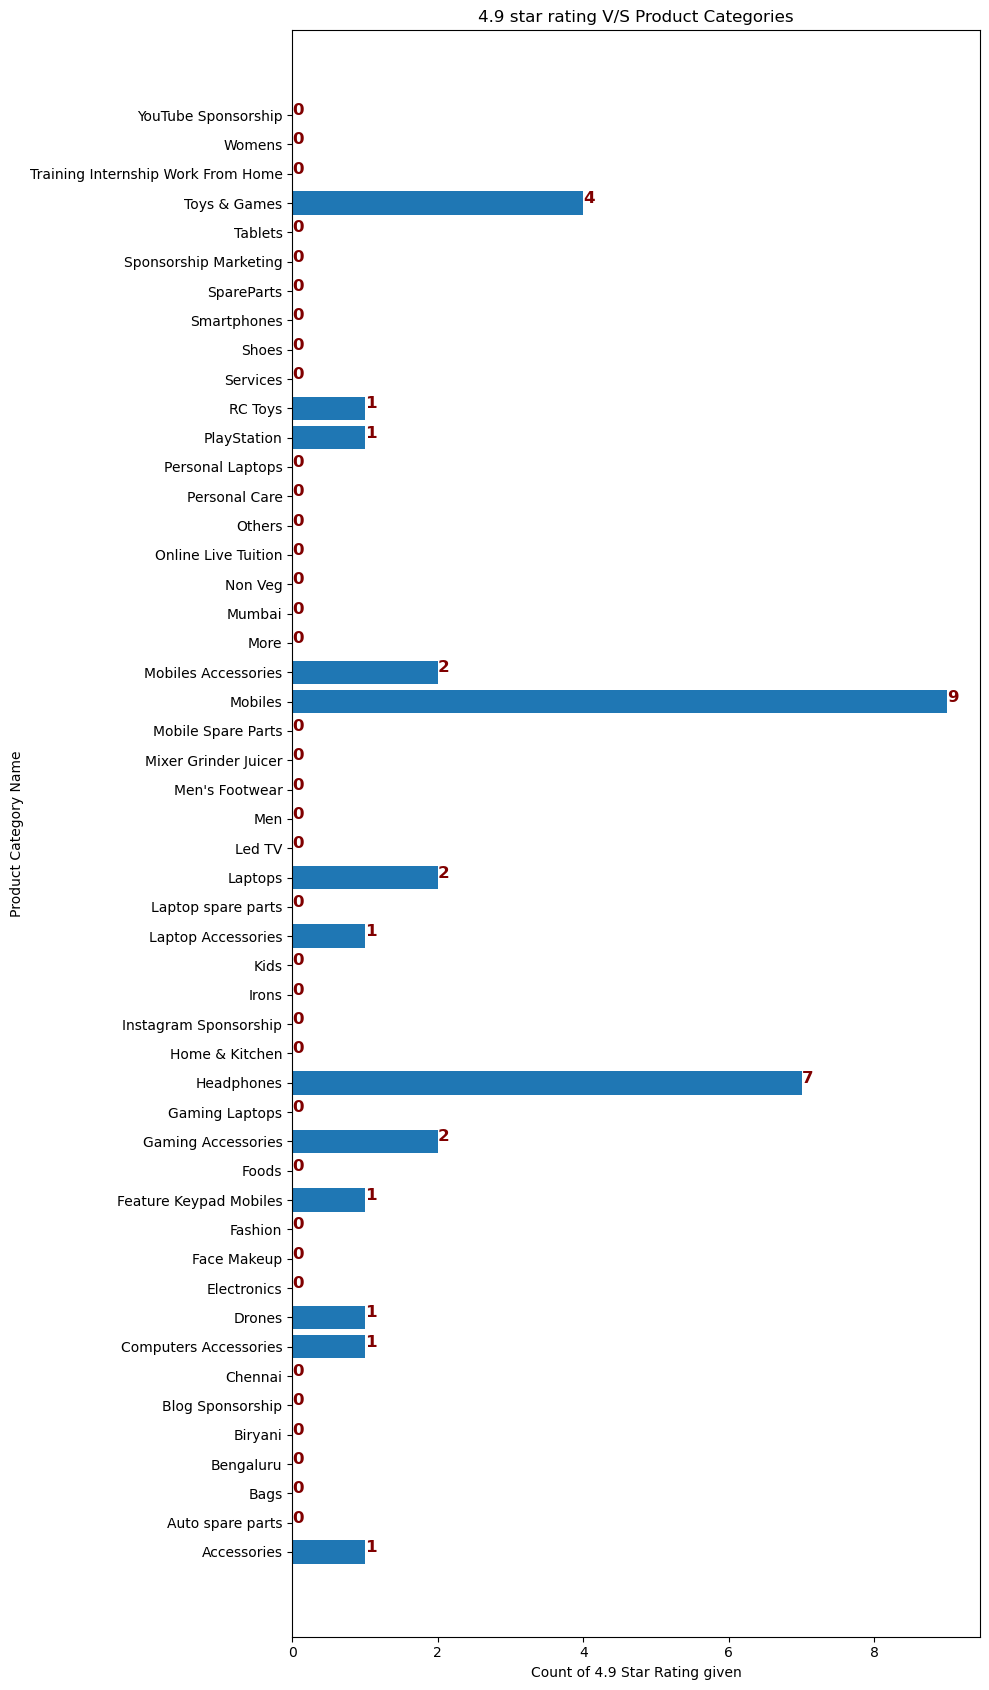

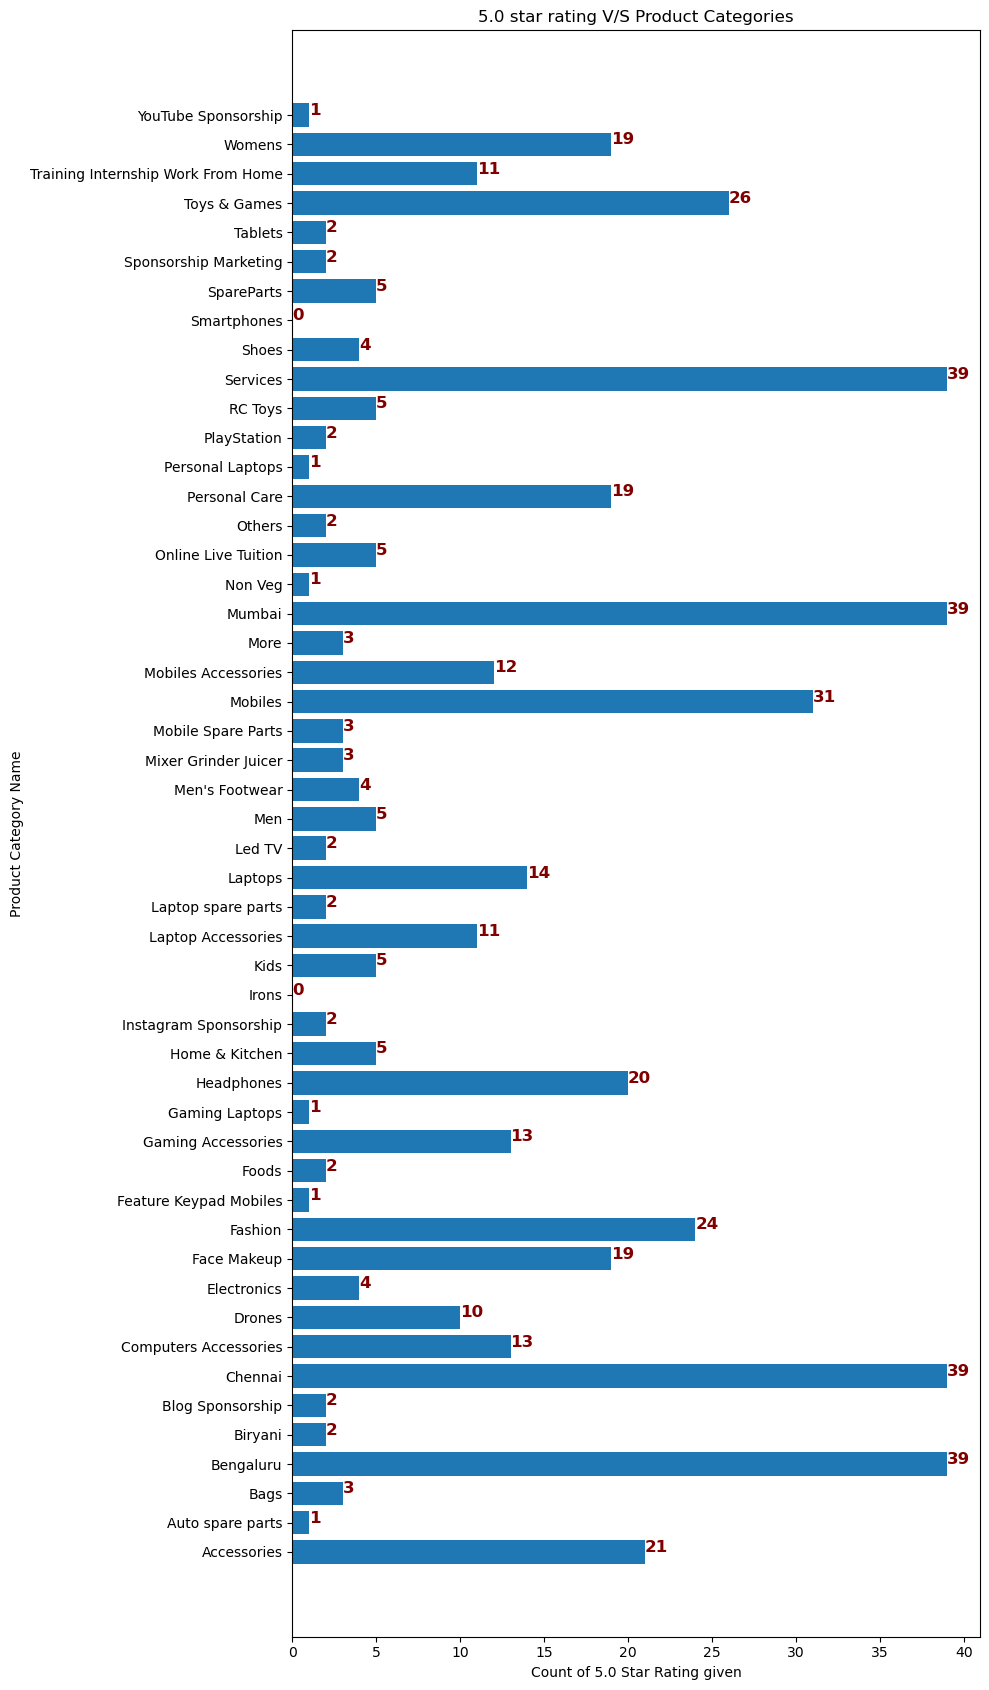

In [14]:
reviews_all_cat()

##  Number of Orders Per Month Per Year

In [15]:
def number_orders_per_month_per_year():
    orders['Order_Date_and_Time_Stamp'] = pd.to_datetime(orders['Order_Date_and_Time_Stamp'])
    orders_per_month_per_year = orders.groupby([orders['Order_Date_and_Time_Stamp'].dt.year.rename('Year'), orders['Order_Date_and_Time_Stamp'].dt.month.rename('Month')])['Order #'].count().reset_index()
    orders_2016 = orders_per_month_per_year[(orders_per_month_per_year['Year'] == 2016)]
    orders_2017 = orders_per_month_per_year[(orders_per_month_per_year['Year'] == 2017)]
    orders_2018 = orders_per_month_per_year[(orders_per_month_per_year['Year'] == 2018)]
    orders_2019 = orders_per_month_per_year[(orders_per_month_per_year['Year'] == 2019)]
    orders_2020 = orders_per_month_per_year[(orders_per_month_per_year['Year'] == 2020)]
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    fig30, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=orders_2016.values,colLabels=orders_2016.columns,loc='center')
    
    fig31 = plt.figure(figsize=(12,8))
    a = list(orders_2016['Month'])
    b = list(orders_2016['Order #'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of Orders for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Number of orders per month for YEAR 2016')
    
    fig32, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=orders_2017.values,colLabels=orders_2017.columns,loc='center')
    
    fig33 = plt.figure(figsize=(12,8))
    a = list(orders_2017['Month'])
    b = list(orders_2017['Order #'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of Orders for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Number of orders per month for YEAR 2017')
    
    fig34, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=orders_2018.values,colLabels=orders_2018.columns,loc='center')
    
    fig35 = plt.figure(figsize=(12,8))
    a = list(orders_2018['Month'])
    b = list(orders_2018['Order #'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of Orders for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Number of orders per month for YEAR 2018')
    
    fig36, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=orders_2019.values,colLabels=orders_2019.columns,loc='center')
    
    fig37 = plt.figure(figsize=(12,8))
    a = list(orders_2019['Month'])
    b = list(orders_2019['Order #'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of Orders for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Number of orders per month for YEAR 2019')
    
    fig38, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=orders_2020.values,colLabels=orders_2020.columns,loc='center')
    
    fig39 = plt.figure(figsize=(12,8))
    a = list(orders_2020['Month'])
    b = list(orders_2020['Order #'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of Orders for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Number of orders per month for YEAR 2020')
    
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("Number of orders per month 2016")
    for fig_idx, fig in enumerate([fig31], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([orders_2016], start=1):
        rows = dataframe_to_rows(orders_2016, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet.cell(row=r_idx, column=3+df_idx).value = row[2]
    
    
    df_sheet_1 = workbook.create_sheet("Number of orders per month 2017")
    for fig_idx, fig in enumerate([fig33], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_1.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([orders_2017], start=1):
        rows = dataframe_to_rows(orders_2017, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_1.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_1.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_1.cell(row=r_idx, column=3+df_idx).value = row[2]
    
    df_sheet_2 = workbook.create_sheet("Number of orders per month 2018")
    for fig_idx, fig in enumerate([fig35], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_2.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([orders_2018], start=1):
        rows = dataframe_to_rows(orders_2018, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_2.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_2.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_2.cell(row=r_idx, column=3+df_idx).value = row[2]
            
    df_sheet_3 = workbook.create_sheet("Number of orders per month 2019")
    for fig_idx, fig in enumerate([fig37], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_3.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([orders_2019], start=1):
        rows = dataframe_to_rows(orders_2019, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_3.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_3.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_3.cell(row=r_idx, column=3+df_idx).value = row[2]
    
    
    df_sheet_4 = workbook.create_sheet("Number of orders per month 2020")
    for fig_idx, fig in enumerate([fig39], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_4.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([orders_2020], start=1):
        rows = dataframe_to_rows(orders_2020, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_4.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_4.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_4.cell(row=r_idx, column=3+df_idx).value = row[2]
            
    workbook.save("NumberOrdersMonthYear.xlsx")
    
    filename = "Number of Orders Per Month Per Year.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename) 

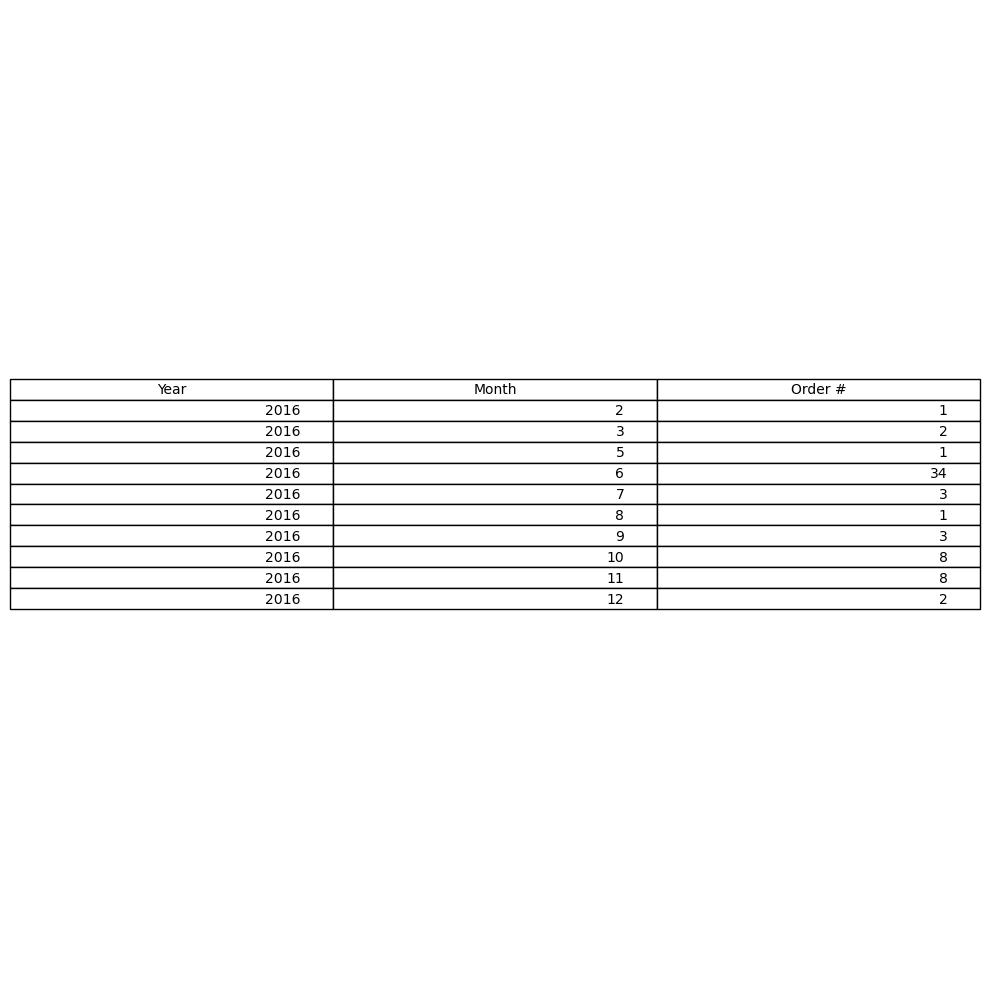

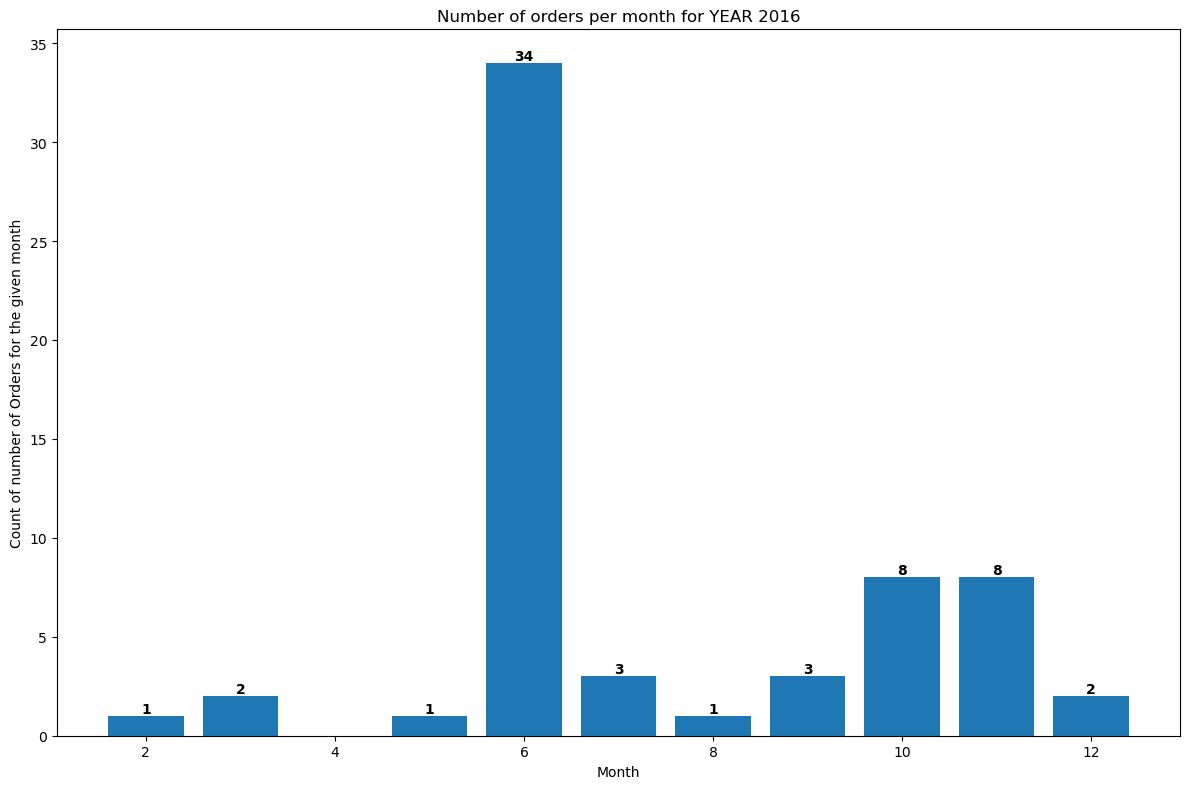

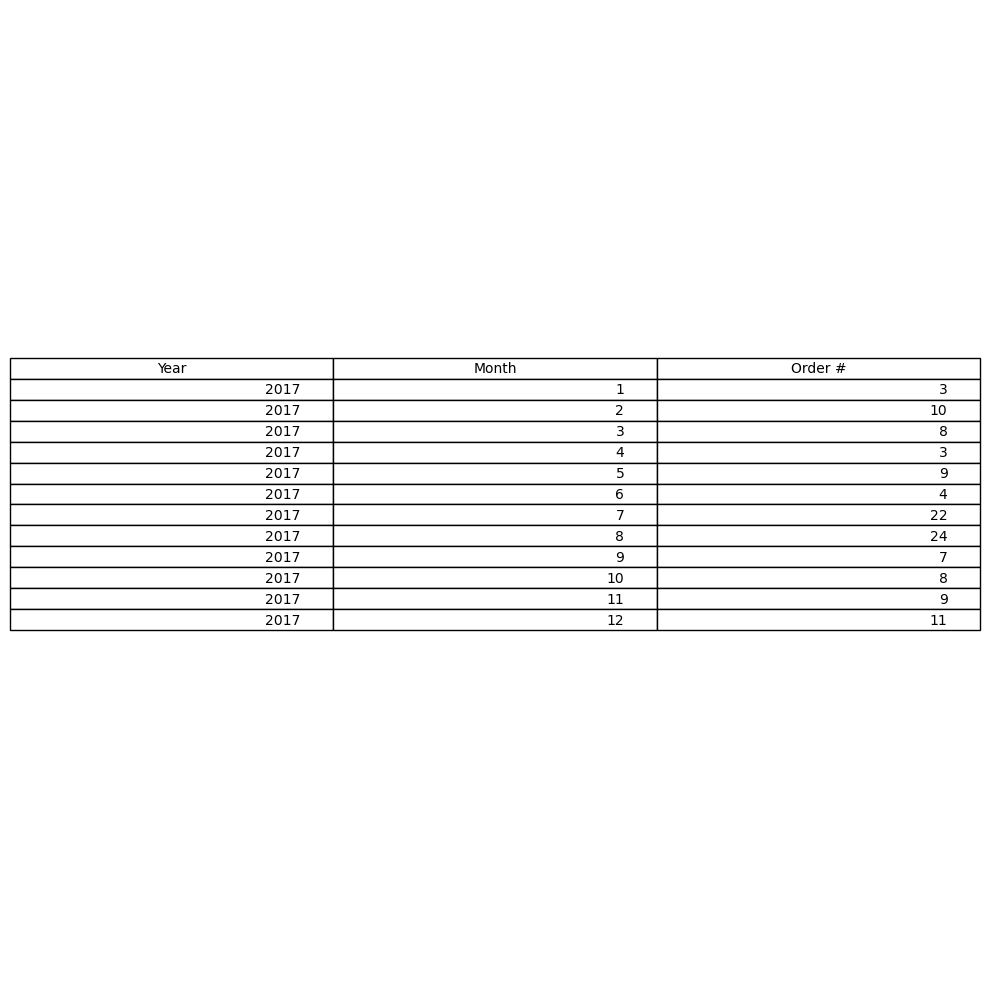

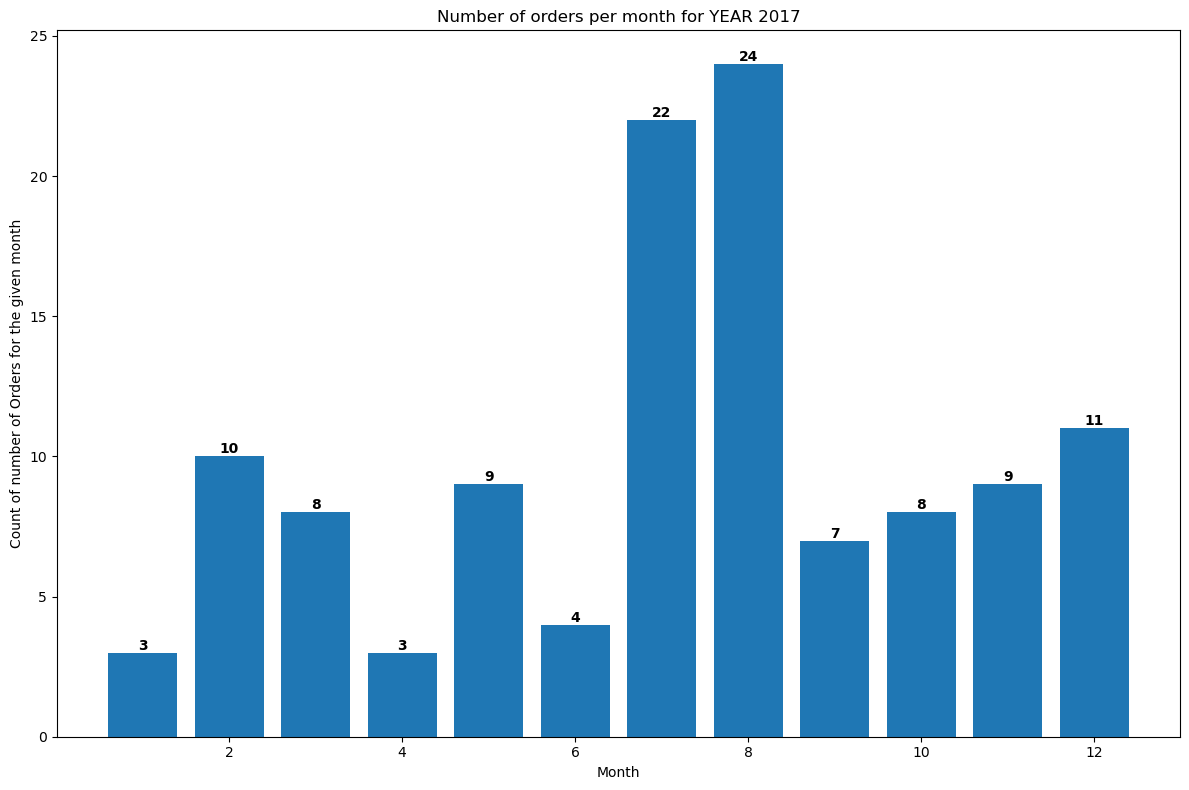

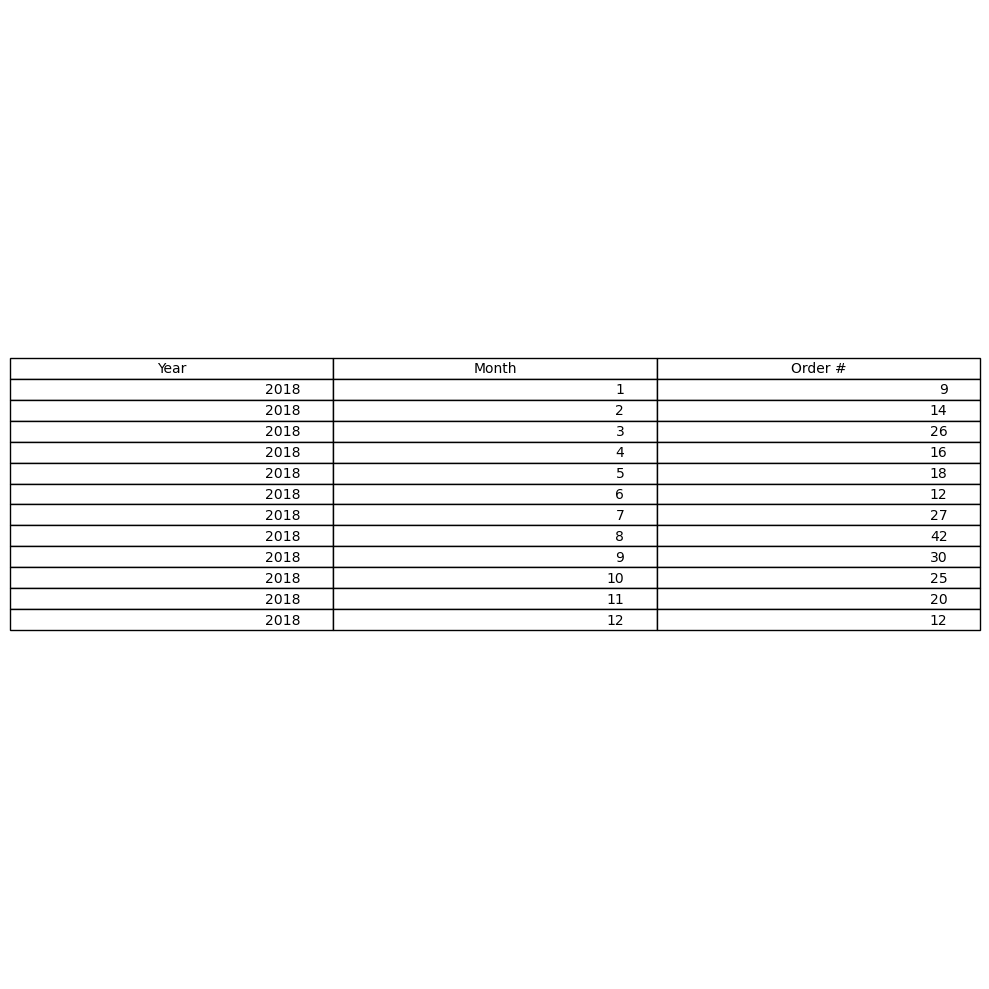

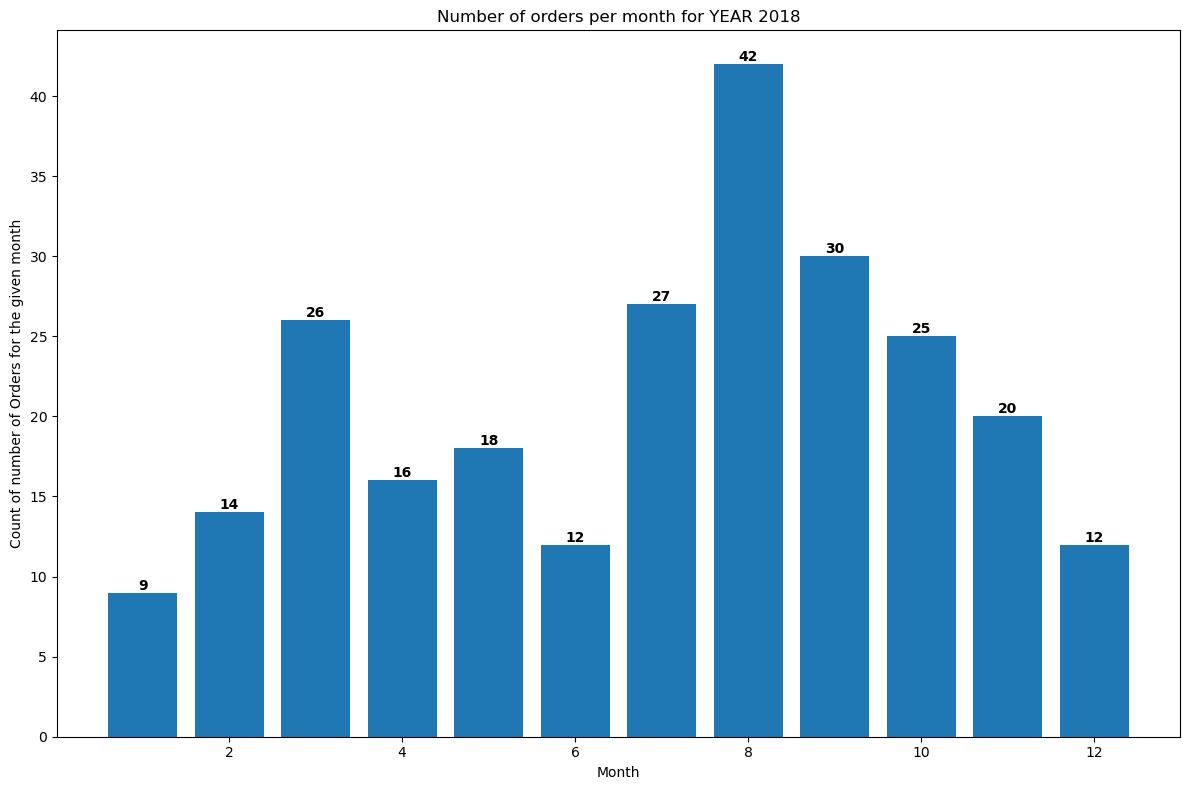

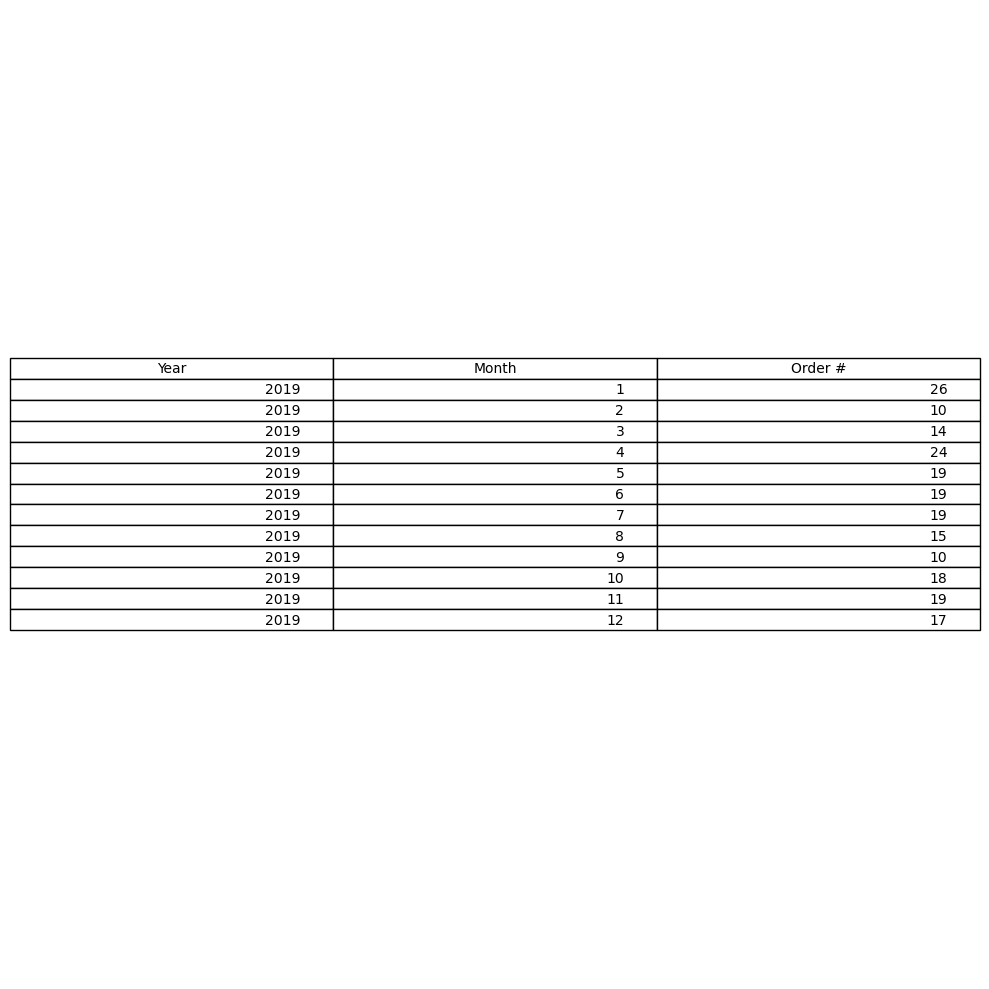

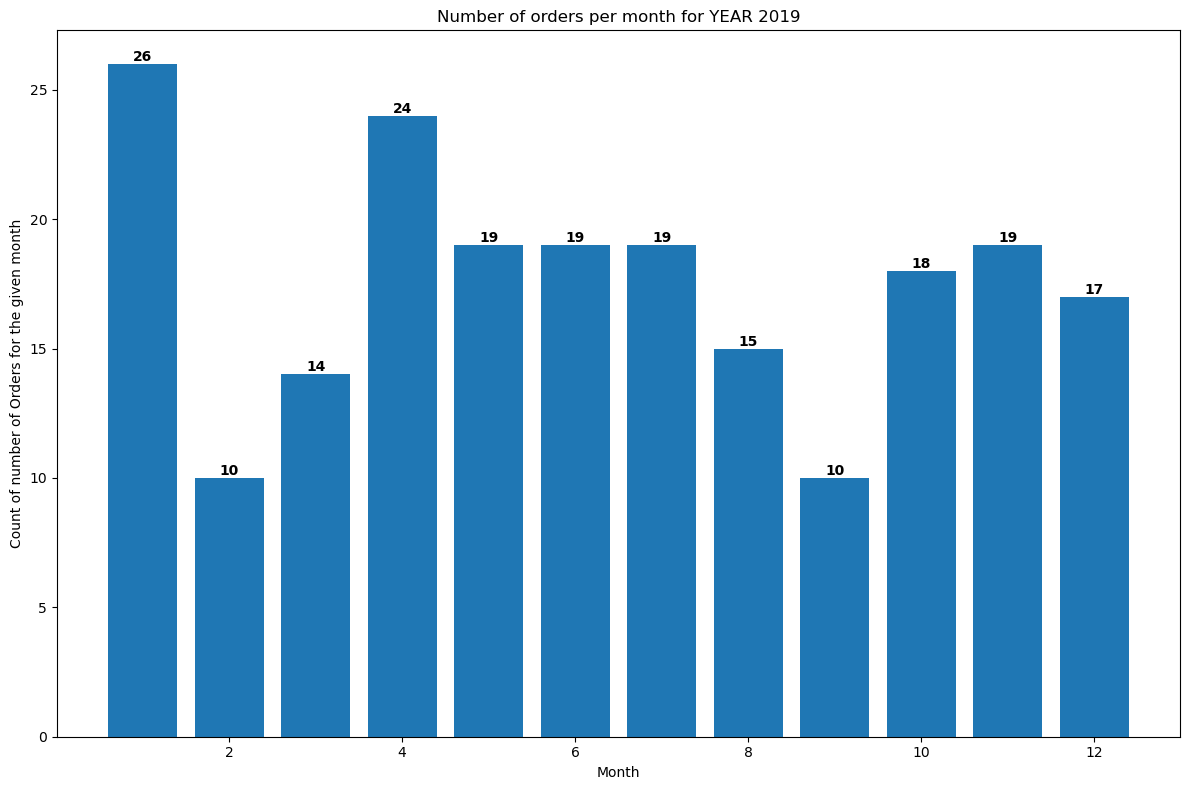

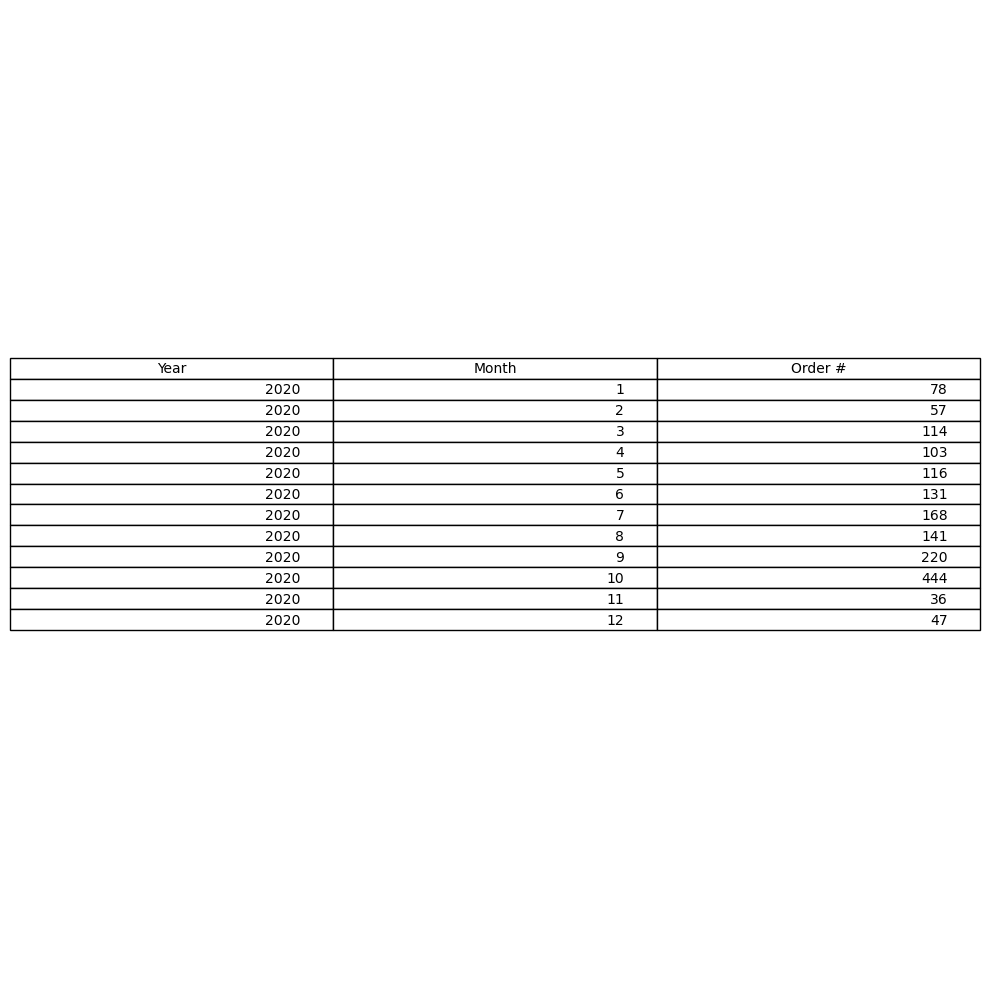

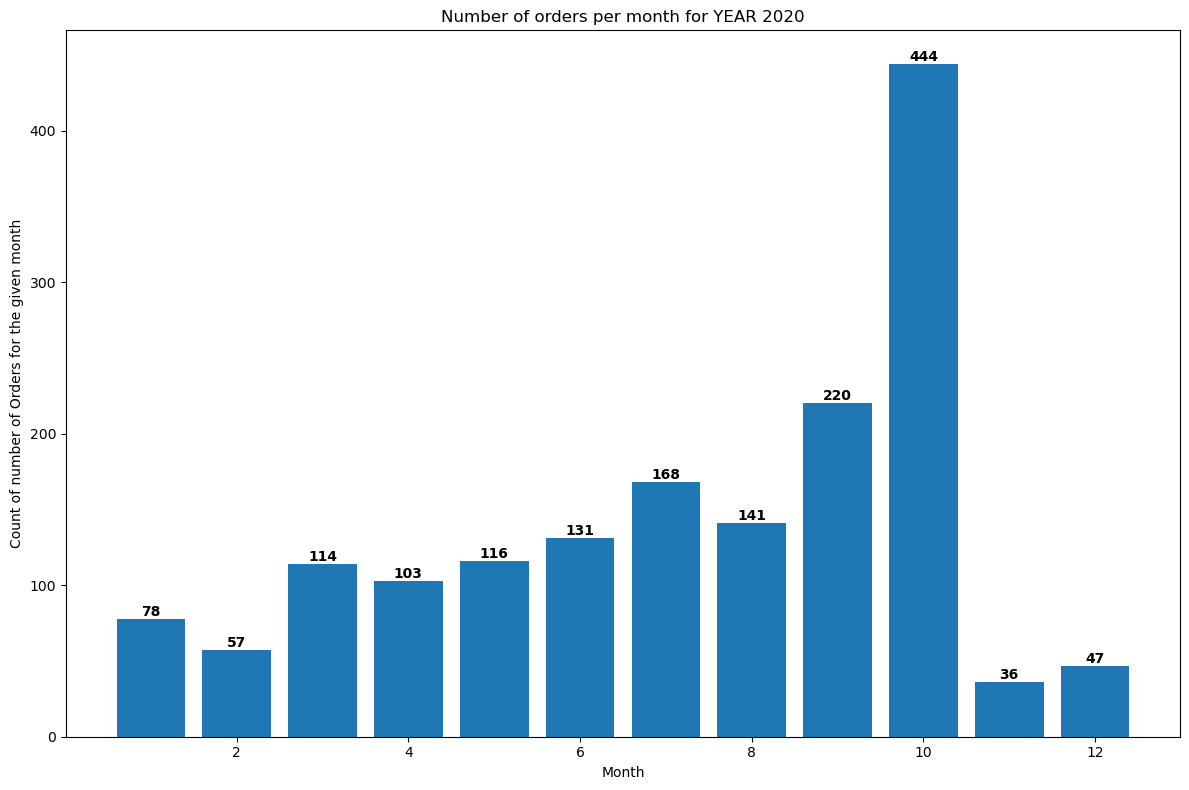

In [16]:
number_orders_per_month_per_year()

## Reviews for Number of Orders Per Month Per Year

In [24]:
def reviews_number_orders_per_month_per_year():
    merged_dataset = pd.merge(orders, reviews, on='product_name')
    merged_dataset_sort = merged_dataset.loc[:,['Order #','Order_Date_and_Time_Stamp','stars']]
    merged_dataset_sort['Order_Date_and_Time_Stamp'] = pd.to_datetime(merged_dataset_sort['Order_Date_and_Time_Stamp'])
    reviews_orders_per_month_per_year = merged_dataset_sort.groupby([merged_dataset_sort['Order_Date_and_Time_Stamp'].dt.year.rename('Year'), merged_dataset_sort['Order_Date_and_Time_Stamp'].dt.month.rename('Month')])['stars'].count().reset_index()
    
    reviews_orders_2016 = reviews_orders_per_month_per_year[(reviews_orders_per_month_per_year['Year'] == 2016)]
    reviews_orders_2017 = reviews_orders_per_month_per_year[(reviews_orders_per_month_per_year['Year'] == 2017)]
    reviews_orders_2018 = reviews_orders_per_month_per_year[(reviews_orders_per_month_per_year['Year'] == 2018)]
    reviews_orders_2019 = reviews_orders_per_month_per_year[(reviews_orders_per_month_per_year['Year'] == 2019)]
    reviews_orders_2020 = reviews_orders_per_month_per_year[(reviews_orders_per_month_per_year['Year'] == 2020)]
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    fig40, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=reviews_orders_2016.values,colLabels=reviews_orders_2016.columns,loc='center')
    
    fig41 = plt.figure(figsize=(12,8))
    a = list(reviews_orders_2016['Month'])
    b = list(reviews_orders_2016['stars'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of reviews for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Reviews Orders Per Month for YEAR 2016')
    
    fig42, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=reviews_orders_2017.values,colLabels=reviews_orders_2017.columns,loc='center')
    
    fig43 = plt.figure(figsize=(12,8))
    a = list(reviews_orders_2017['Month'])
    b = list(reviews_orders_2017['stars'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of reviews for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Reviews Orders Per Month for YEAR 2017')
    
    fig44, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=reviews_orders_2018.values,colLabels=reviews_orders_2018.columns,loc='center')
    
    fig45 = plt.figure(figsize=(12,8))
    a = list(reviews_orders_2018['Month'])
    b = list(reviews_orders_2018['stars'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of reviews for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Reviews Orders Per Month for YEAR 2018')
    
    fig46, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=reviews_orders_2019.values,colLabels=reviews_orders_2019.columns,loc='center')
    
    fig47 = plt.figure(figsize=(12,8))
    a = list(reviews_orders_2019['Month'])
    b = list(reviews_orders_2019['stars'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of reviews for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Reviews Orders Per Month for YEAR 2019')
    
    fig48, ax =plt.subplots(figsize=(10,10))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=reviews_orders_2020.values,colLabels=reviews_orders_2020.columns,loc='center')
    
    fig49 = plt.figure(figsize=(12,8))
    a = list(reviews_orders_2020['Month'])
    b = list(reviews_orders_2020['stars'])
    plt.bar(a, b)
    plt.xlabel('Month')
    plt.ylabel('Count of number of reviews for the given month')
    for i, (x, y) in enumerate(zip(a, b)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.title('Reviews Orders Per Month for YEAR 2020')
    
    # create a new excel workbook
    workbook = Workbook()
    
    # create a new worksheet for dataframes
    df_sheet = workbook.create_sheet("Reviews orders per month 2016")
    for fig_idx, fig in enumerate([fig41], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([reviews_orders_2016], start=1):
        rows = dataframe_to_rows(reviews_orders_2016, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet.cell(row=r_idx, column=3+df_idx).value = row[2]
            
    # create a new worksheet for dataframes
    df_sheet_1 = workbook.create_sheet("Reviews orders per month 2017")
    for fig_idx, fig in enumerate([fig43], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_1.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([reviews_orders_2017], start=1):
        rows = dataframe_to_rows(reviews_orders_2017, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_1.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_1.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_1.cell(row=r_idx, column=3+df_idx).value = row[2]
            
    # create a new worksheet for dataframes
    df_sheet_2 = workbook.create_sheet("Reviews orders per month 2018")
    for fig_idx, fig in enumerate([fig45], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_2.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([reviews_orders_2018], start=1):
        rows = dataframe_to_rows(reviews_orders_2018, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_2.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_2.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_2.cell(row=r_idx, column=3+df_idx).value = row[2]
            
    # create a new worksheet for dataframes
    df_sheet_3 = workbook.create_sheet("Reviews orders per month 2019")
    for fig_idx, fig in enumerate([fig47], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_3.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([reviews_orders_2019], start=1):
        rows = dataframe_to_rows(reviews_orders_2019, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_3.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_3.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_3.cell(row=r_idx, column=3+df_idx).value = row[2]
    
    # create a new worksheet for dataframes
    df_sheet_4 = workbook.create_sheet("Reviews orders per month 2020")
    for fig_idx, fig in enumerate([fig49], start=2):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_4.add_image(img, f"A{fig_idx}")
    # write the dataframes to the worksheet
    for df_idx, df in enumerate([reviews_orders_2020], start=1):
        rows = dataframe_to_rows(reviews_orders_2020, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_4.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_4.cell(row=r_idx, column=2+df_idx).value = row[1]
            df_sheet_4.cell(row=r_idx, column=3+df_idx).value = row[2]
    
    workbook.save("ReviewsOrdersMonthYear.xlsx")
    
    filename = "Reviews Orders Per Month Per Year.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename)

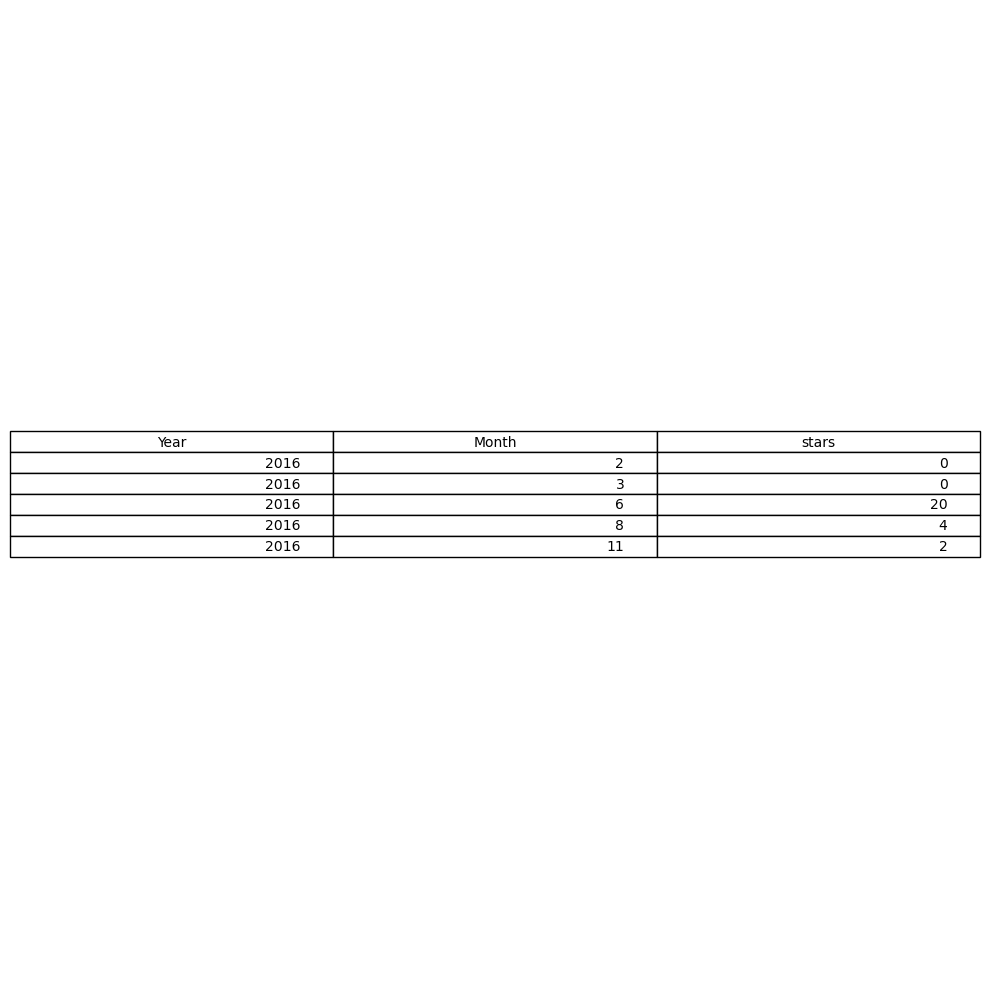

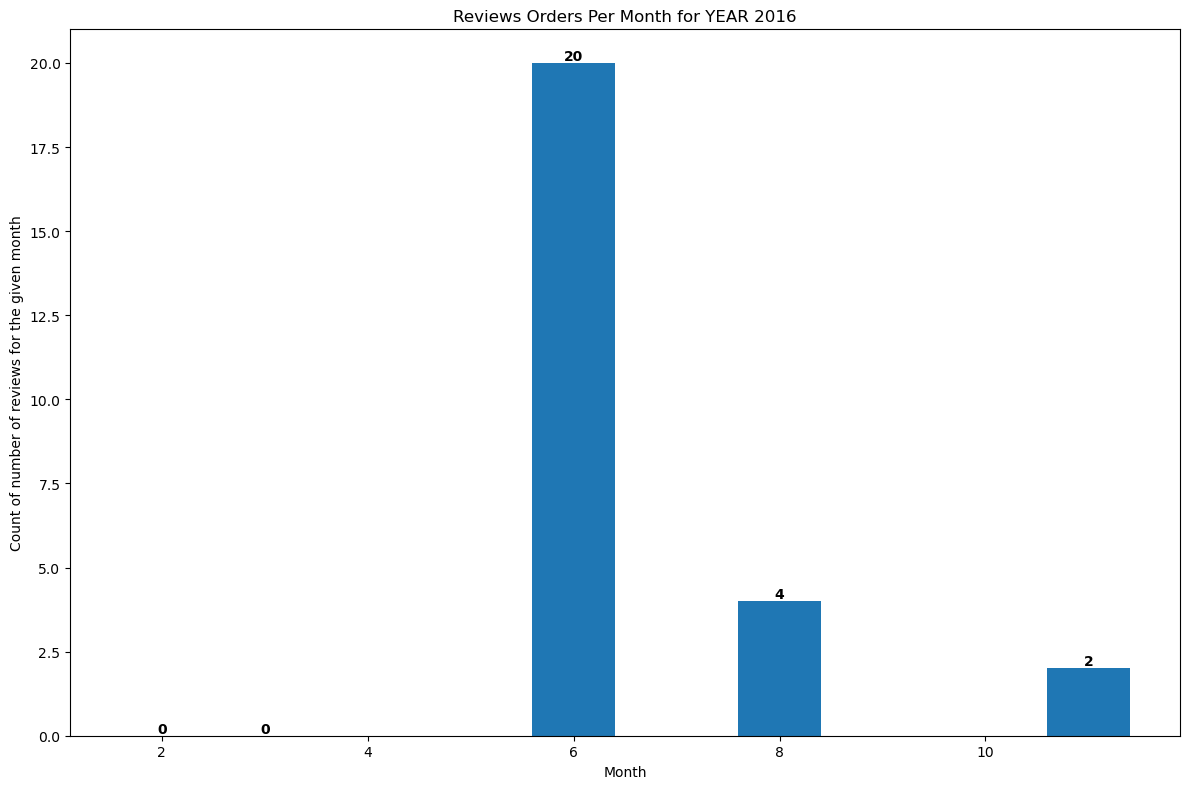

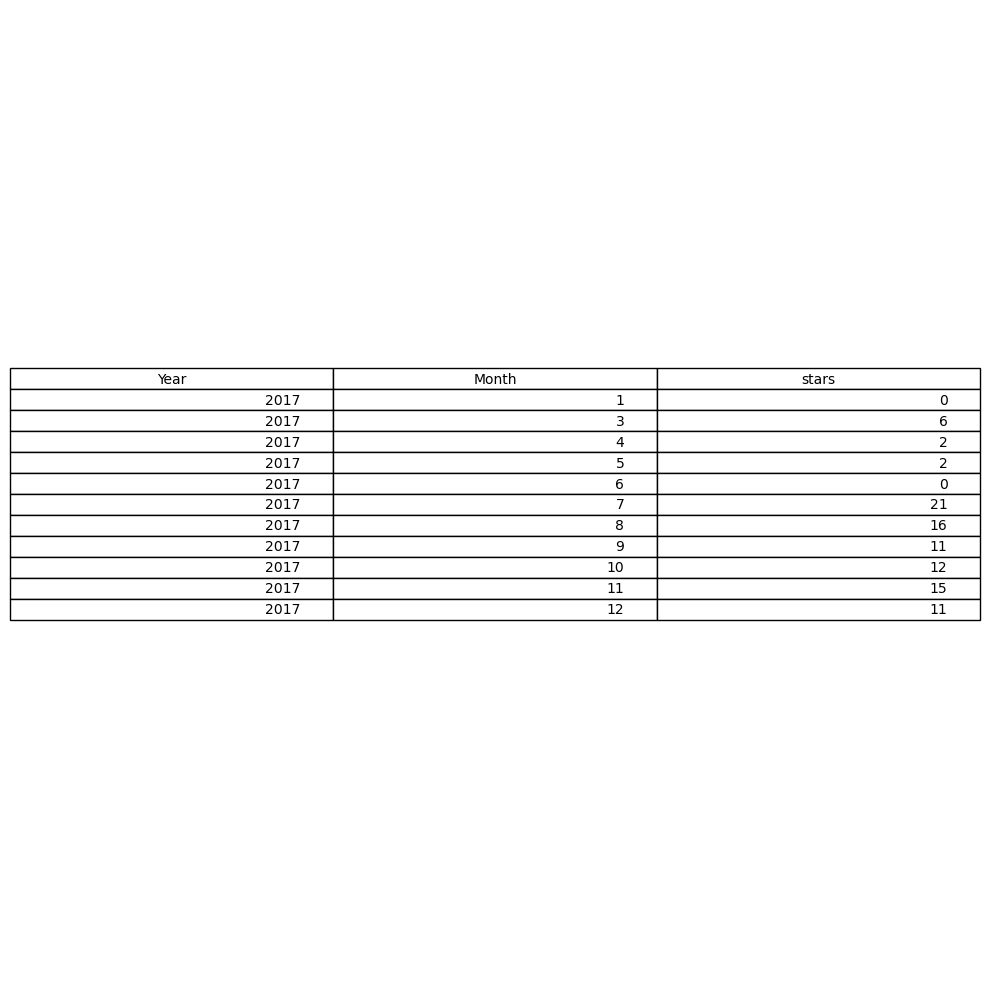

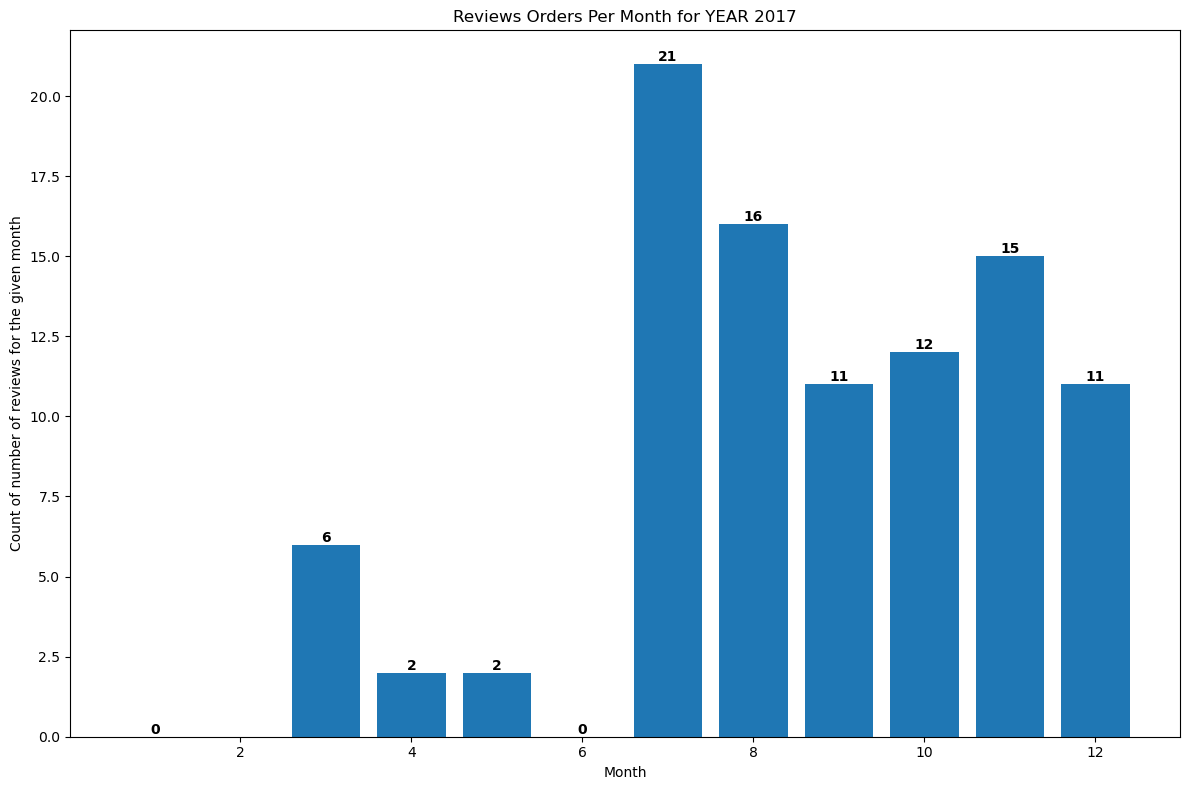

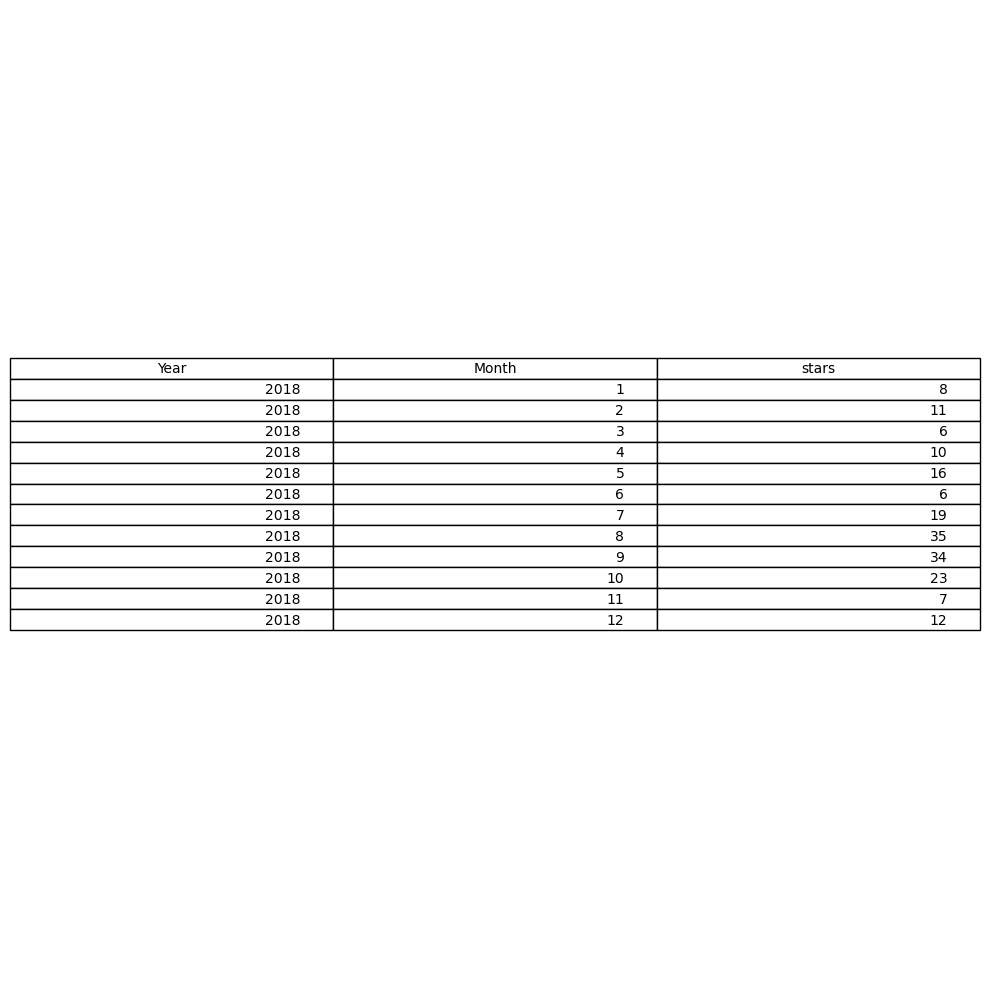

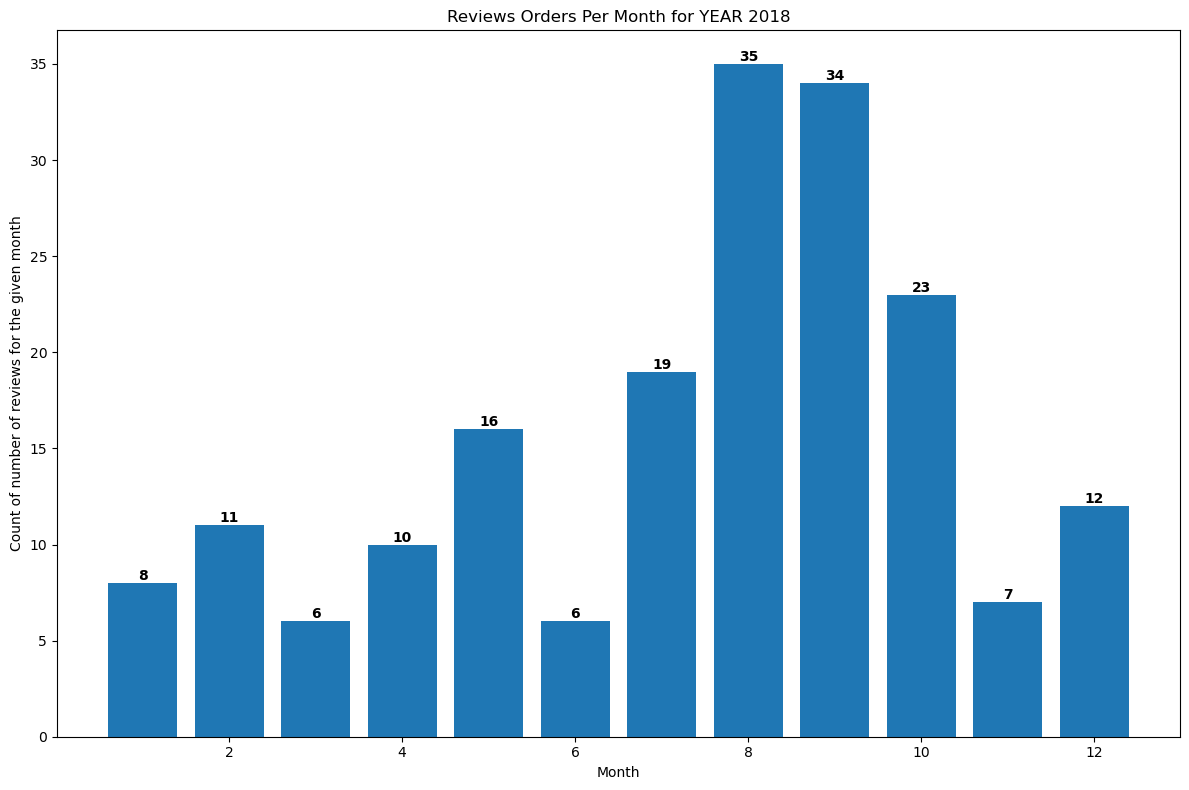

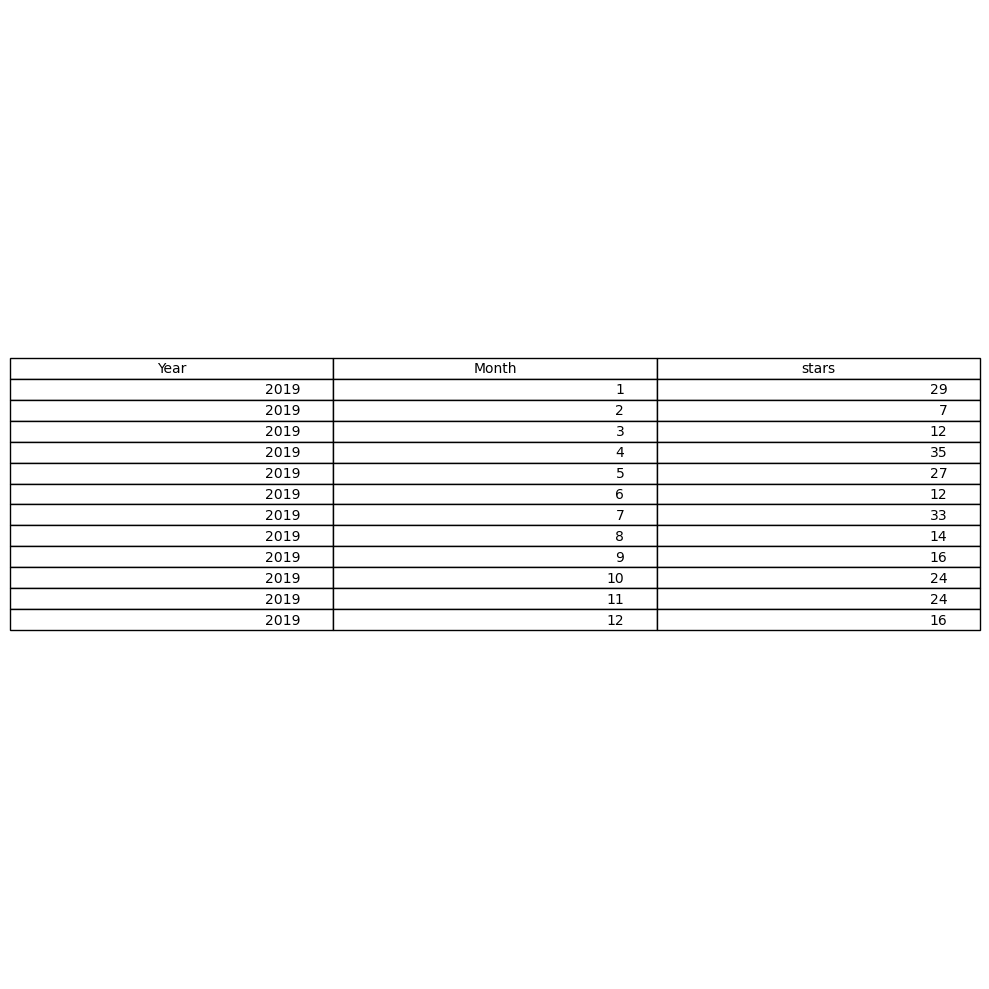

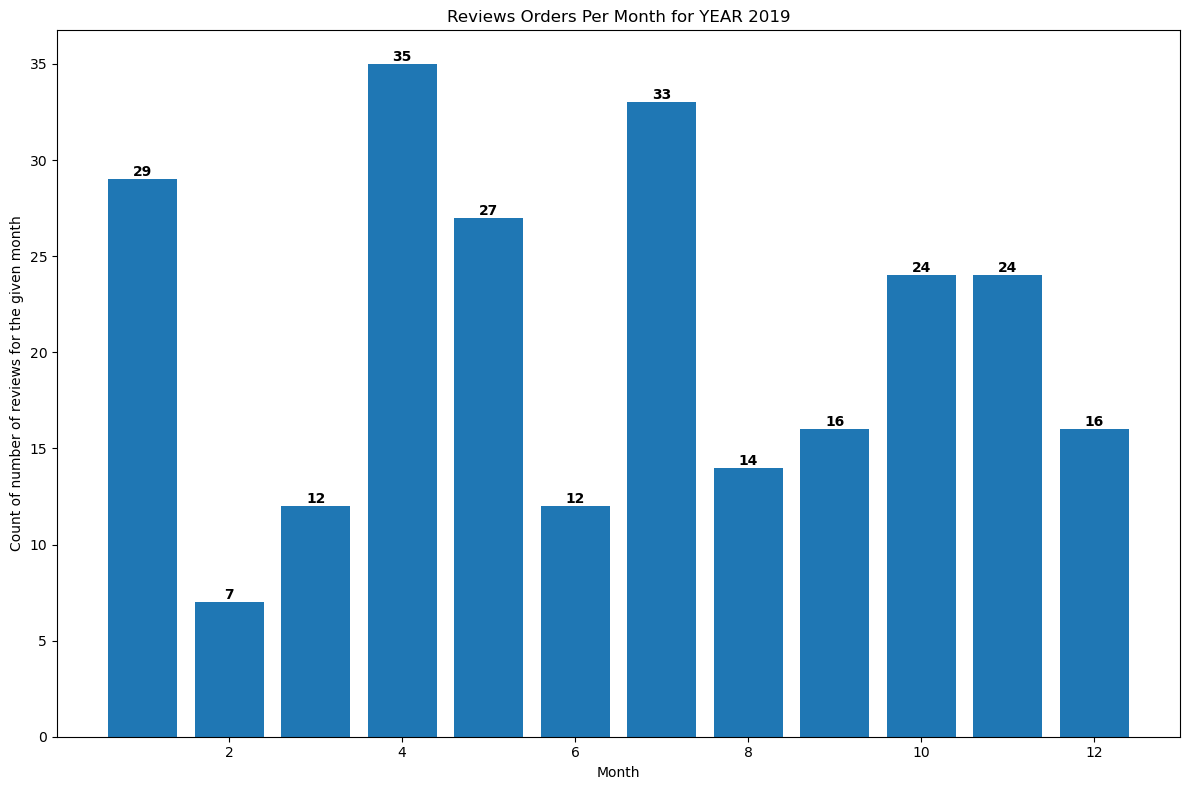

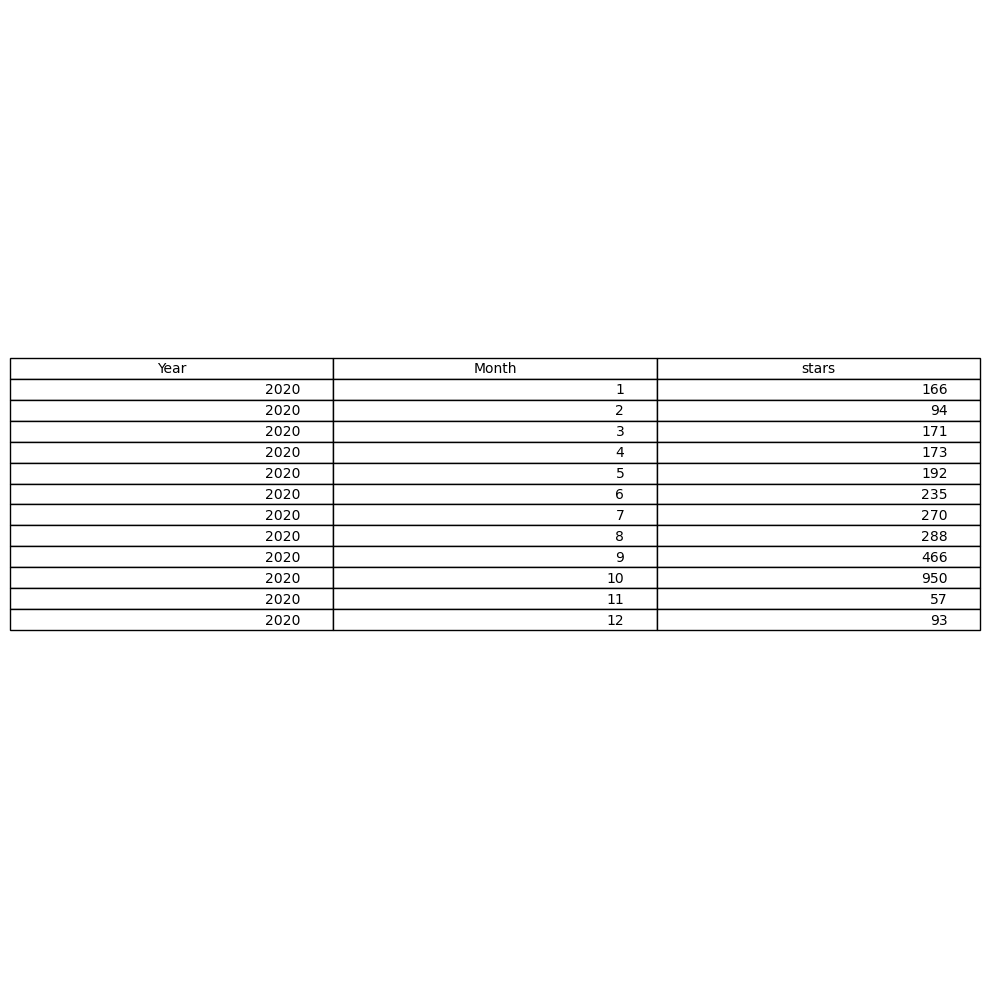

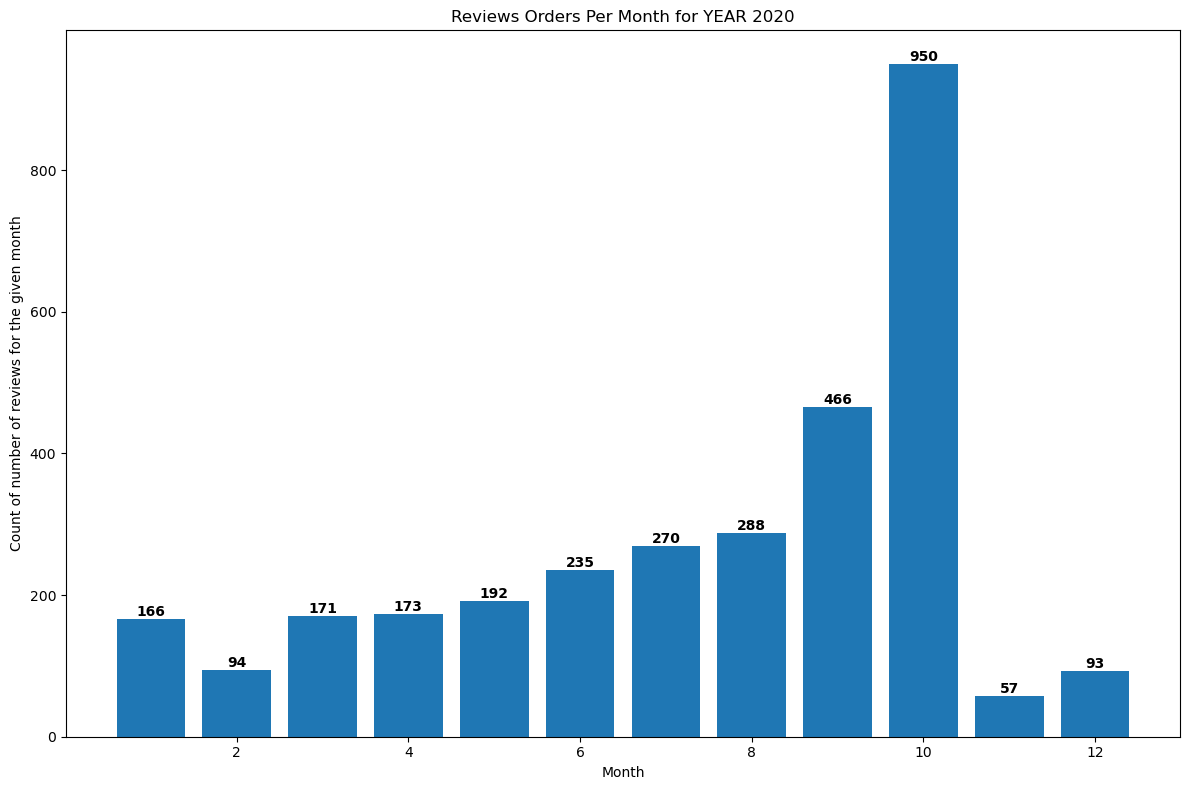

In [25]:
reviews_number_orders_per_month_per_year()

## Number of Orders Across Parts of a Day

In [19]:
def number_orders_day_parts():
    orders['Order_Date_and_Time_Stamp'] = pd.to_datetime(orders['Order_Date_and_Time_Stamp'])
    orders['Part_of_Day'] = pd.cut(orders['Order_Date_and_Time_Stamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)
    orders_by_part_of_day = orders.groupby('Part_of_Day')['Order #'].count().to_frame().reset_index().rename(columns={"Part_of_Day": "Part of Day", "Order #": "Order Count"})
    orders_by_parts_of_day = orders_by_part_of_day
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    fig50, ax =plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=orders_by_parts_of_day.values,colLabels=orders_by_parts_of_day.columns,loc='center')
    #fig50.tight_layout(pad=0)
    
    fig51 = plt.figure()
    #ax = fig51.add_axes([0,0,1,1])
    y = orders_by_parts_of_day['Part of Day']
    z = orders_by_parts_of_day['Order Count']
    plt.bar(y,z)
    plt.ylabel('Number of Orders')
    plt.xlabel('Part of Day')
    plt.title('Orders across day part')
    for i, (x, y) in enumerate(zip(y,z)):
        plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold', fontsize=10)
    #fig51.tight_layout(pad=0)
    workbook = Workbook()
    # write the dataframes to the worksheet
    df_sheet_a = workbook.create_sheet("Orders across day parts")
    for fig_idx, fig in enumerate([fig50,fig51], start=1):
        plt.figure(fig_idx)
        plt.savefig(f"figure{fig_idx}.png")
        img = Image(f"figure{fig_idx}.png")
        df_sheet_a.add_image(img, f"A{fig_idx}")
    
    for df_idx, df in enumerate([orders_by_parts_of_day], start=1):
        rows = dataframe_to_rows(orders_by_parts_of_day, index=False, header=True)
        for r_idx, row in enumerate(rows, start=1):
            df_sheet_a.cell(row=r_idx, column=1+df_idx).value = row[0]
            df_sheet_a.cell(row=r_idx, column=2+df_idx).value = row[1]
            
    workbook.save("Num Orders Across Day.xlsx")       
    
    filename = "Number of Orders Across Parts of a Day.pdf"
    def save_image(filename):
        
        # PdfPages is a wrapper around pdf 
        # file so there is no clash and create
        # files with no error.
        p = PdfPages(filename)
          
        # get_fignums Return list of existing 
        # figure numbers
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
          
        # iterating over the numbers in list
        for fig in figs: 
            
            # and saving the files
            #fig.tight_layout(pad=0)
            fig.savefig(p, format='pdf') 
          
        # close the object
        p.close()    
      
        # call the function
    save_image(filename)

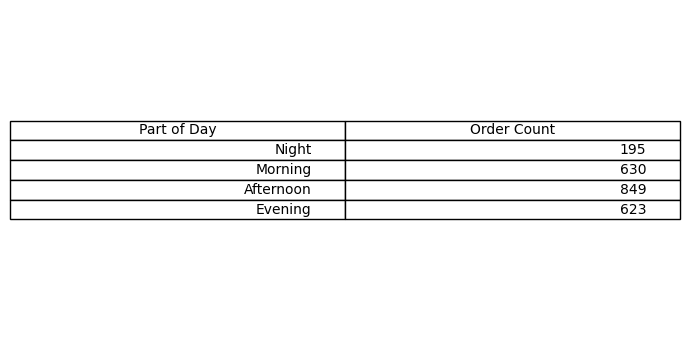

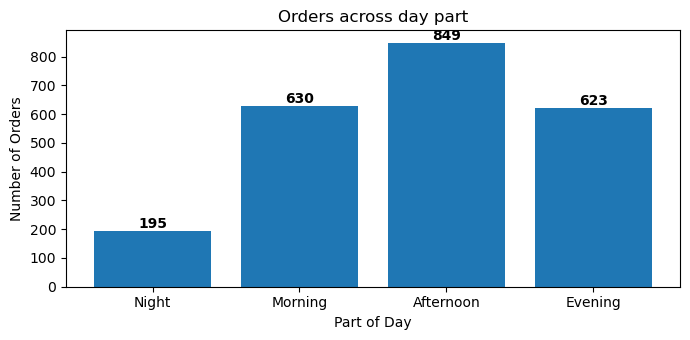

In [20]:
number_orders_day_parts()

In [21]:
import os
from PyPDF2 import PdfFileMerger, PdfMerger

In [32]:
def full_report():
    # Replace "pdf_folder" with the name of the folder containing your PDF files
    pdf_folder = r"C:\Users\Advait\Desktop\Yoshops Internships\Project Task - 2"
    
    # Create a list of all PDF files in the folder
    pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith(".pdf")]
    
    # Create a PdfFileMerger object
    merger = PdfMerger()
    
    # Loop through the PDF files and append them to the merger object
    for pdf_file in pdf_files:
        pdf_path = os.path.join(pdf_folder, pdf_file)
        merger.append(open(pdf_path, "rb"))
    
    # Write the merged PDF to a new file
    with open("full_report.pdf", "wb") as output:
        merger.write(output)
    
    # Replace "excel_folder" with the name of the folder containing your Excel files
    excel_folder = r"C:\Users\Advait\Desktop\Yoshops Internships\Project Task - 2"
    
    # Create a list of all Excel files in the folder
    excel_files = [f for f in os.listdir(excel_folder) if f.endswith(".xlsx")]
    
    # Create a dictionary to hold the sheet data for each source file and sheet name
    sheet_data_dict = {}
    
    # Loop through the Excel files and append their sheets to the sheet_data_dict
    for excel_file in excel_files:
        excel_path = os.path.join(excel_folder, excel_file)
        excel_data = pd.read_excel(excel_path, sheet_name=None)
        for sheet_name, sheet_data in excel_data.items():
            sheet_data["source_file"] = excel_file
            sheet_data["source_sheet"] = sheet_name
            key = (excel_file, sheet_name)
            if key in sheet_data_dict:
                sheet_data_dict[key] = sheet_data_dict[key].append(sheet_data)
            else:
                sheet_data_dict[key] = sheet_data
    
    # Write each sheet to a separate sheet in the output Excel file
    with pd.ExcelWriter("full_report.xlsx") as writer:
        for (excel_file, sheet_name), sheet_data in sheet_data_dict.items():
            sheet_data.to_excel(writer, sheet_name=f"{excel_file}", index=False)
    
            
        

In [26]:
full_report()

In [33]:
print("Welcome to Yoshops.com.")
print("\n\nPlease select any one of the option:- ")
print("\n\n Enter 1 to see the analysis of Reviews given by Customers")
print("\n\n Enter 2 to see the analysis of different payment methods used by the Customers")
print("\n\n Enter 3 to see the analysis of Top Consumer States of India")
print("\n\n Enter 4 to see the analysis of Top Consumer Cities of India")
print("\n\n Enter 5 to see the analysis of Top Selling Product Categories")
print("\n\n Enter 6 to see the analysis of Reviews for All Product Categories")
print("\n\n Enter 7 to see the analysis of Number of Orders Per Month Per Year")
print("\n\n Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year")
print("\n\n Enter 9 to see the analysis of Number of Orders Across Parts of a Day")
print("\n\n Enter 10 to see the Full Report(First Excecute all options once and then select this one)")
choice = int(input("\n\nEnter only the numeric option(1,2,3,..,10) here : "))
print("\n\nYou have selected option ",choice)

def yoshops_eda(choice):
    if choice == 1:
        return customer_reviews()
    elif choice == 2:
        return payment_methods()
    elif choice == 3:
        return top_consumer_states()
    elif choice == 4:
        return top_consumer_cities()
    elif choice == 5:
        return top_selling_product_cat()
    elif choice == 6:
        return reviews_all_cat()
    elif choice == 7:
        return number_orders_per_month_per_year()
    elif choice == 8:
        return reviews_number_orders_per_month_per_year()
    elif choice == 9:
        return number_orders_day_parts()
    elif choice == 10:
        return full_report()
    else:
        print("\n\nYou have entered a false choice. Please go through the available options and try again")
yoshops_eda(choice)

Welcome to Yoshops.com.


Please select any one of the option:- 


 Enter 1 to see the analysis of Reviews given by Customers


 Enter 2 to see the analysis of different payment methods used by the Customers


 Enter 3 to see the analysis of Top Consumer States of India


 Enter 4 to see the analysis of Top Consumer Cities of India


 Enter 5 to see the analysis of Top Selling Product Categories


 Enter 6 to see the analysis of Reviews for All Product Categories


 Enter 7 to see the analysis of Number of Orders Per Month Per Year


 Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year


 Enter 9 to see the analysis of Number of Orders Across Parts of a Day


 Enter 10 to see the Full Report(First Excecute all options once and then select this one)


Enter only the numeric option(1,2,3,..,10) here : 10


You have selected option  10
